# EDA on the dynamics of GRN networks scores

- Last updated: 2/14/2024
- Author: Yang-Joon Kim

Description/notes:
- Exploratry data analysis on GRNs from different timepoints.

- Analyses where we'd like to see how the GRN evolves over time/development.
    - First, for the same cell-type (progenitor, or in intermediate fate), how does the GRN evolves over the developmental stages (real-time).
    - [Dictys] Second, for the same dev stage, how does the GRN evolves over the developmental trajectories (mesoderm/neuroectoderm trajectories, for example). 
    - From these analyses, can we learn a transient key driver genes/TFs that were unidentifiable from "static" GRNs?

In [1]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str

'0.14.0'

In [3]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 600

In [4]:
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/EDA_GRN_network_score_dynamics/"
os.makedirs(figpath, exist_ok=True)

## Step 1. Import the GRNs (Links object)

In [5]:
# # import the GRNs (Links objects)
# TDR118_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/08_TDR118_celltype_GRNs.celloracle.links")
# TDR119_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR119_cicero_output/08_TDR119_celltype_GRNs.celloracle.links")

In [8]:
# Import 3 GRNs from 16,19, and 24hpf, respectively.
# Note that we chose TDR118 for 16hpf
GRN_10hpf = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/")
GRN_16hpf = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR118_cicero_output/08_TDR118_celltype_GRNs.celloracle.links")
GRN_19hpf = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR125_cicero_output/08_TDR125_celltype_GRNs.celloracle.links")
GRN_24hpf = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/sequencing_ver1/TDR124_cicero_output/08_TDR124_celltype_GRNs.celloracle.links")

# 7. Network analysis; Network score for each gene
The Links class has many functions to visualize network score.
See the documentation for the details of the functions.

## 7.1. Network score in each cluster


We have calculated several network scores using different centrality metrics.
We can use the centrality score to identify key regulatory genes because centrality is one of the important indicators of network structure (https://en.wikipedia.org/wiki/Centrality). 

Let's visualize genes with high network centrality.


In [62]:
oracle.adata.var_names

Index(['msgn1', 'BX649468.1', 'ripply2', 'chrm2a', 'FAR2', 'phlda1', 'pde3a',
       'CU928073.1', 'cd9b', 'ntf3',
       ...
       'fibina', 'rbl2', 'irx5b', 'irx3b', 'urahb', 'igl4v10', 'NC-002333.17',
       'mt-co2', 'mt-atp6', 'mt-co3'],
      dtype='object', length=3000)

In [64]:
# Check cluster name
links.cluster

['Adaxial_Cells',
 'Differentiating_Neurons',
 'Endoderm',
 'Epidermal',
 'Lateral_Mesoderm',
 'Muscle',
 'NMPs',
 'Neural_Anterior',
 'Neural_Crest',
 'Neural_Posterior',
 'Notochord',
 'PSM',
 'Somites',
 'unassigned']

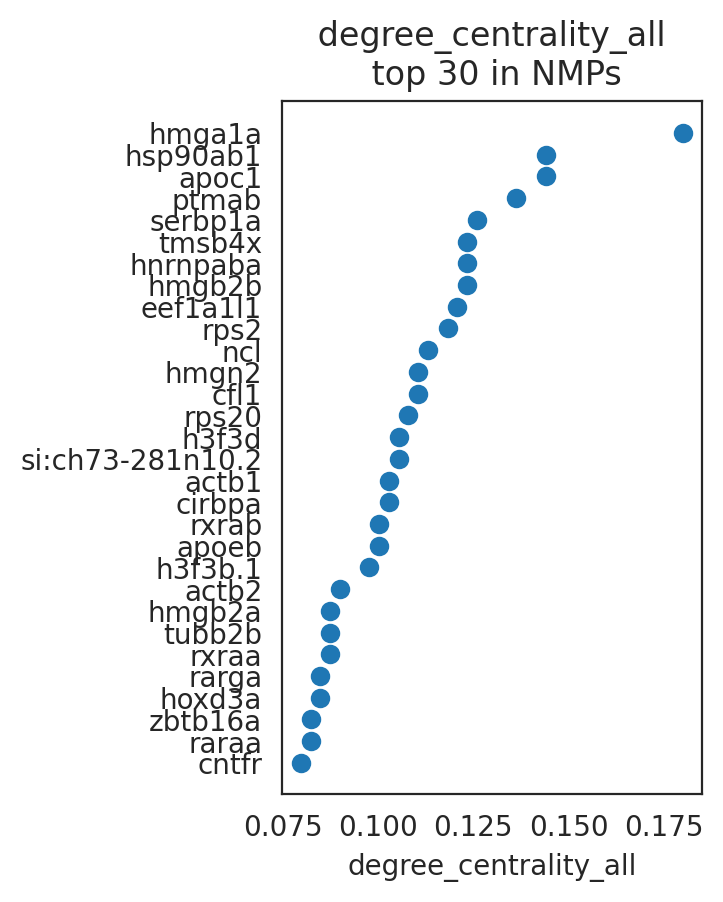

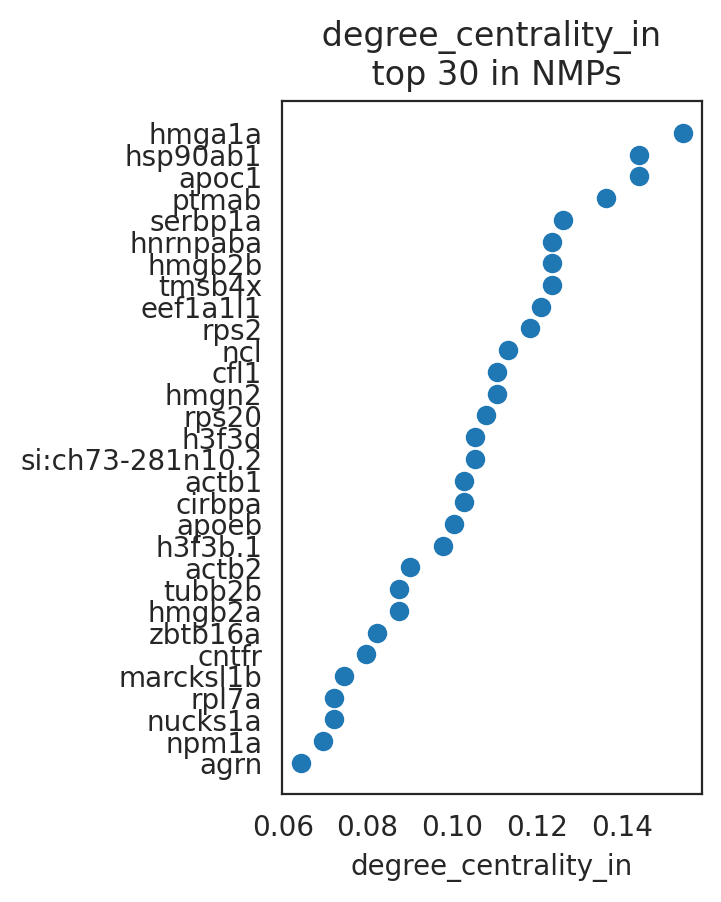

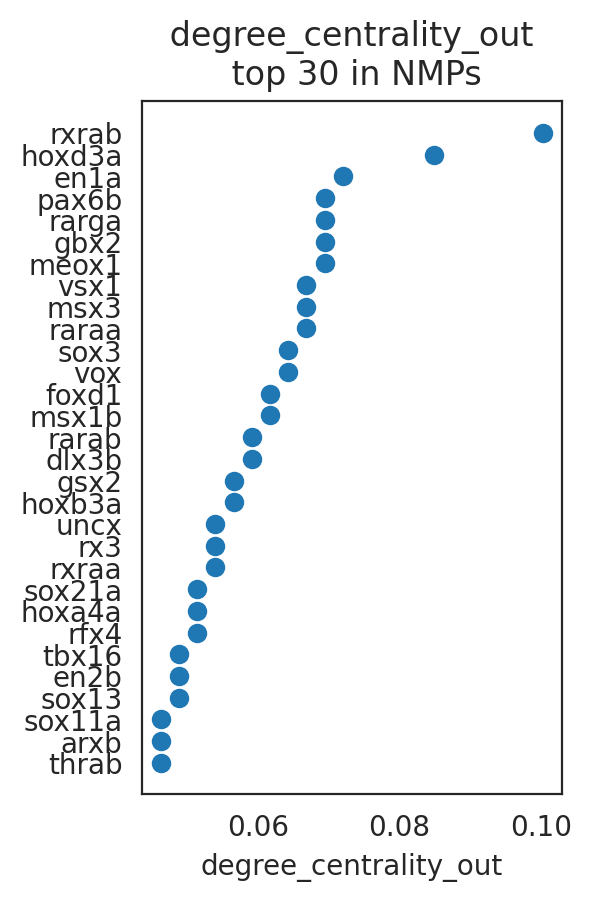

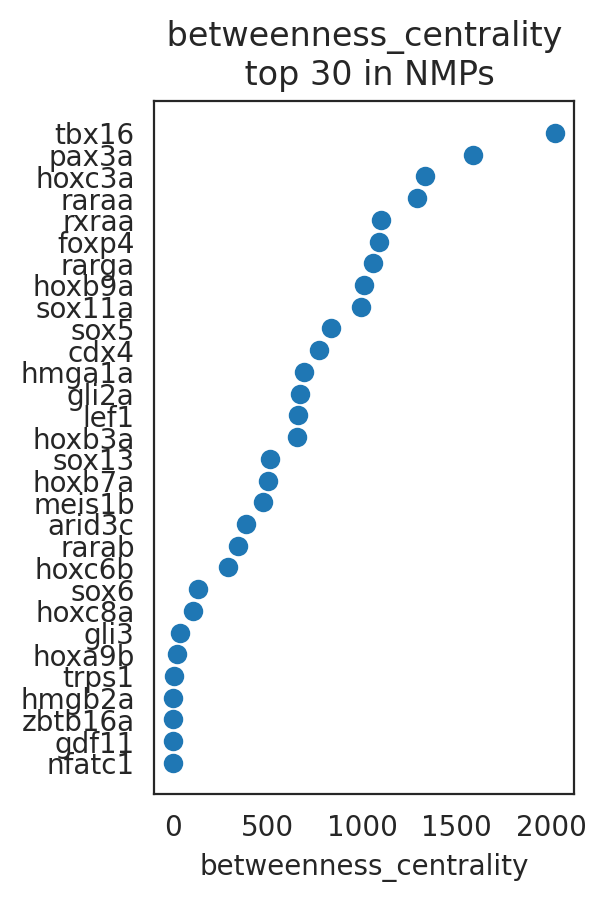

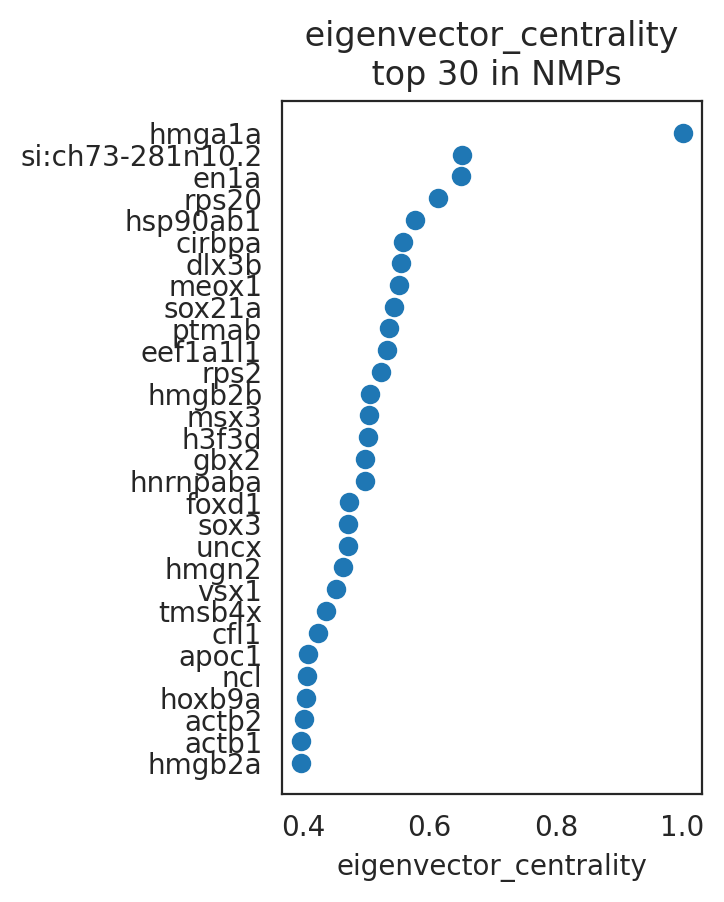

In [65]:
# Visualize top n-th genes that have high scores.
links.plot_scores_as_rank(cluster="NMPs", n_gene=30)#, 
                          #save="TDR118_15somite_GRN_coarse_celltypes/ranked_score")

## 7.2. Network score comparison between two clusters


By comparing network scores between two clusters, we can analyze differences in GRN structure.

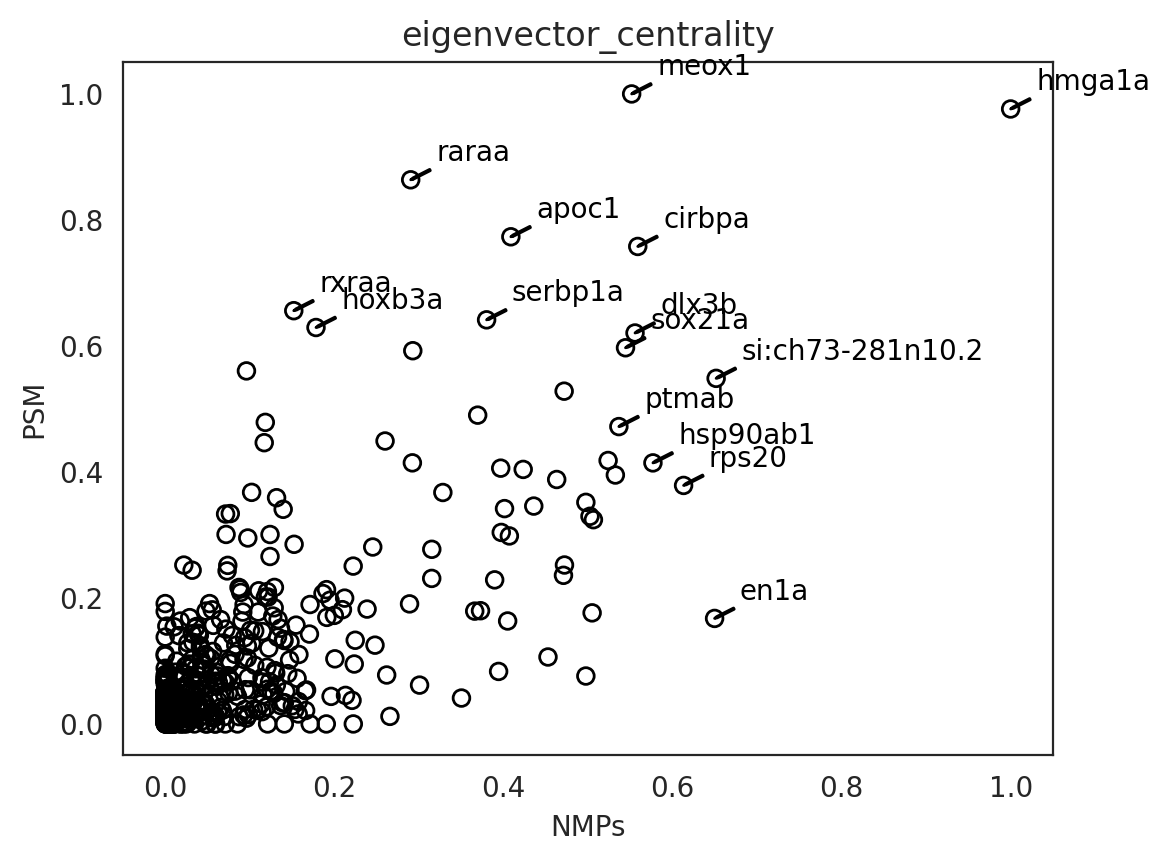

In [68]:
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
links.plot_score_comparison_2D(value="eigenvector_centrality",
                               cluster1="NMPs", cluster2="PSM", 
                               percentile=98) #, save="TDR118_15somite_GRN_coarse_celltypes/score_comparison")

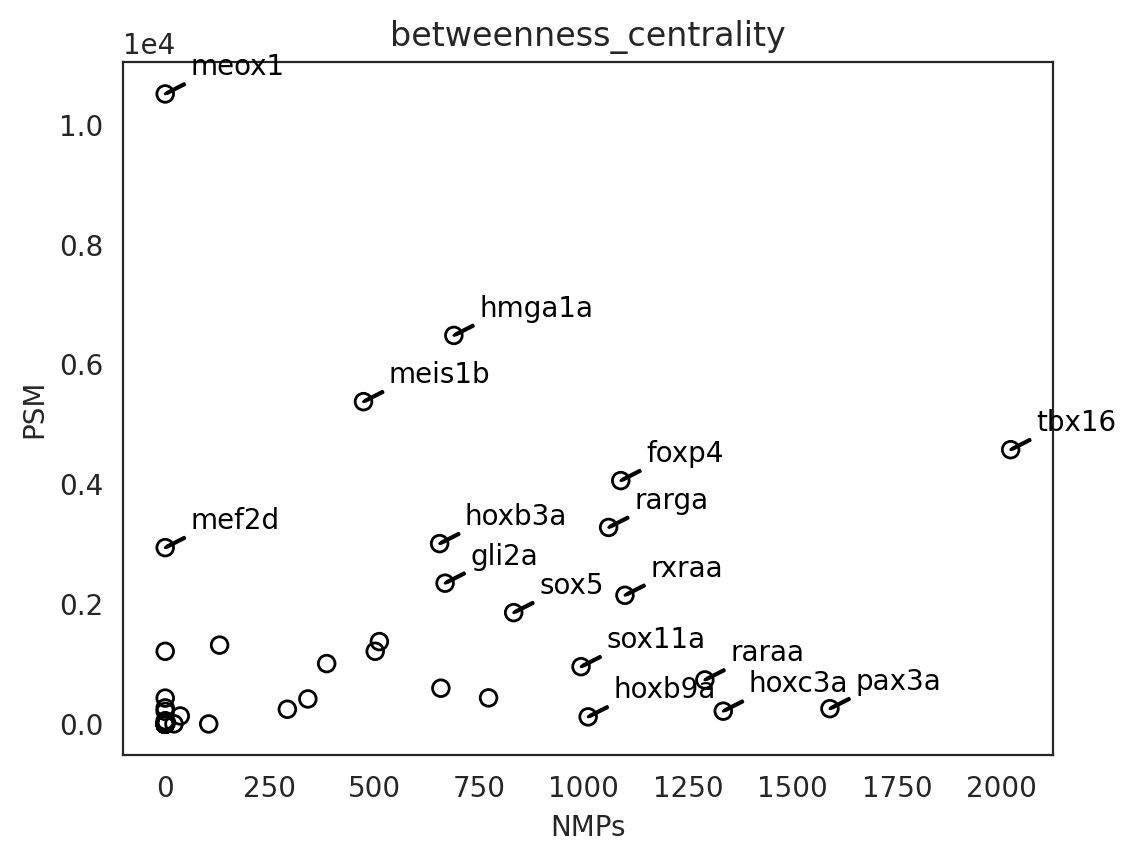

In [69]:

plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
links.plot_score_comparison_2D(value="betweenness_centrality",
                               cluster1="NMPs", cluster2="PSM", 
                               percentile=98) #, save="TDR118_15somite_GRN_coarse_celltypes/score_comparison")

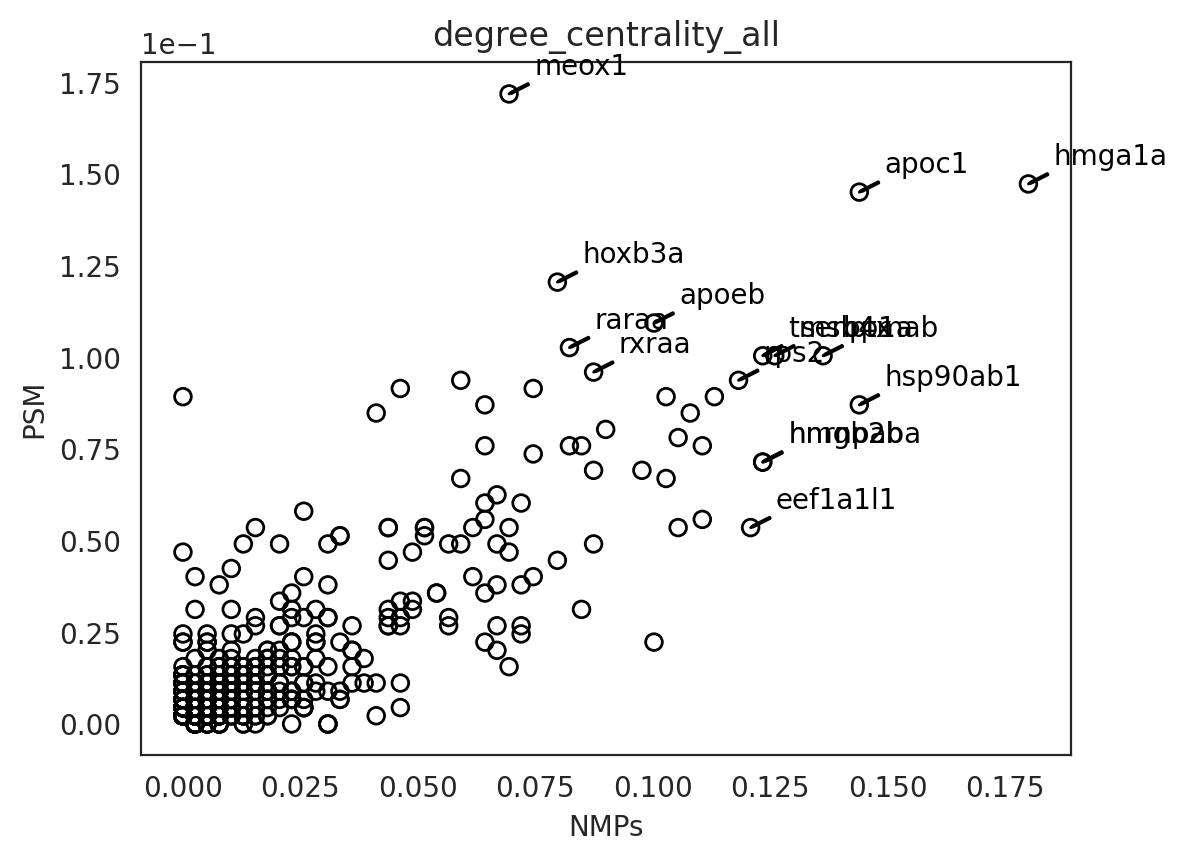

In [70]:
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
links.plot_score_comparison_2D(value="degree_centrality_all",
                               cluster1="NMPs", cluster2="PSM", 
                               percentile=98) #, save="TDR118_15somite_GRN_coarse_celltypes/score_comparison")

## 7.3. Network score dynamics
In the following session, we focus on how a gene's network score changes during the differentiation.

Using Gata2, we will demonstrate how you can visualize networks scores for a single gene.

Gata2 is known to play an essential role in the early MEP and GMP populations. .

tbx16


/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/gene_analysis.py:320: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=res, y="cluster", x=value,
/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/gene_analysis.py:320: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=res, y="cluster", x=value,
/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/gene_analysis.py:320: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=res, y="cluster", x=value,


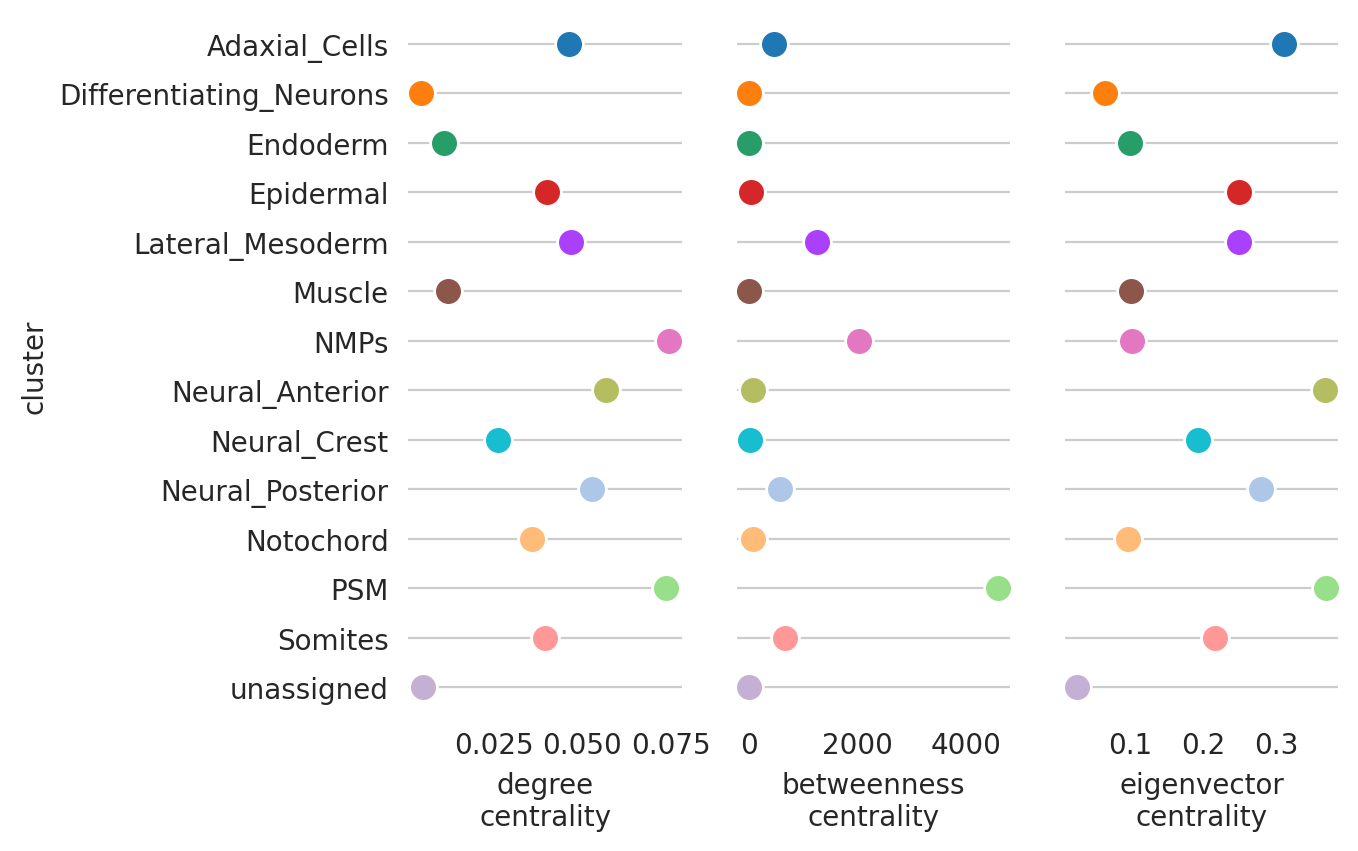

In [74]:
# Visualize Gata2 network score dynamics
links.plot_score_per_cluster(goi="tbx16")#, save="TDR118_15somite_GRN_coarse_celltypes/network_score_per_gene/")

If a gene have no connections in a cluster, it is impossible to calculate network degree scores.
Thus the scores will not be shown.
For example, Cebpa have no connection in the erythloids clusters, and there is no degree scores for Cebpa in these clusters as follows.

pax6a


/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/gene_analysis.py:320: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=res, y="cluster", x=value,
/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/gene_analysis.py:320: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=res, y="cluster", x=value,
/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/gene_analysis.py:320: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=res, y="cluster", x=value,


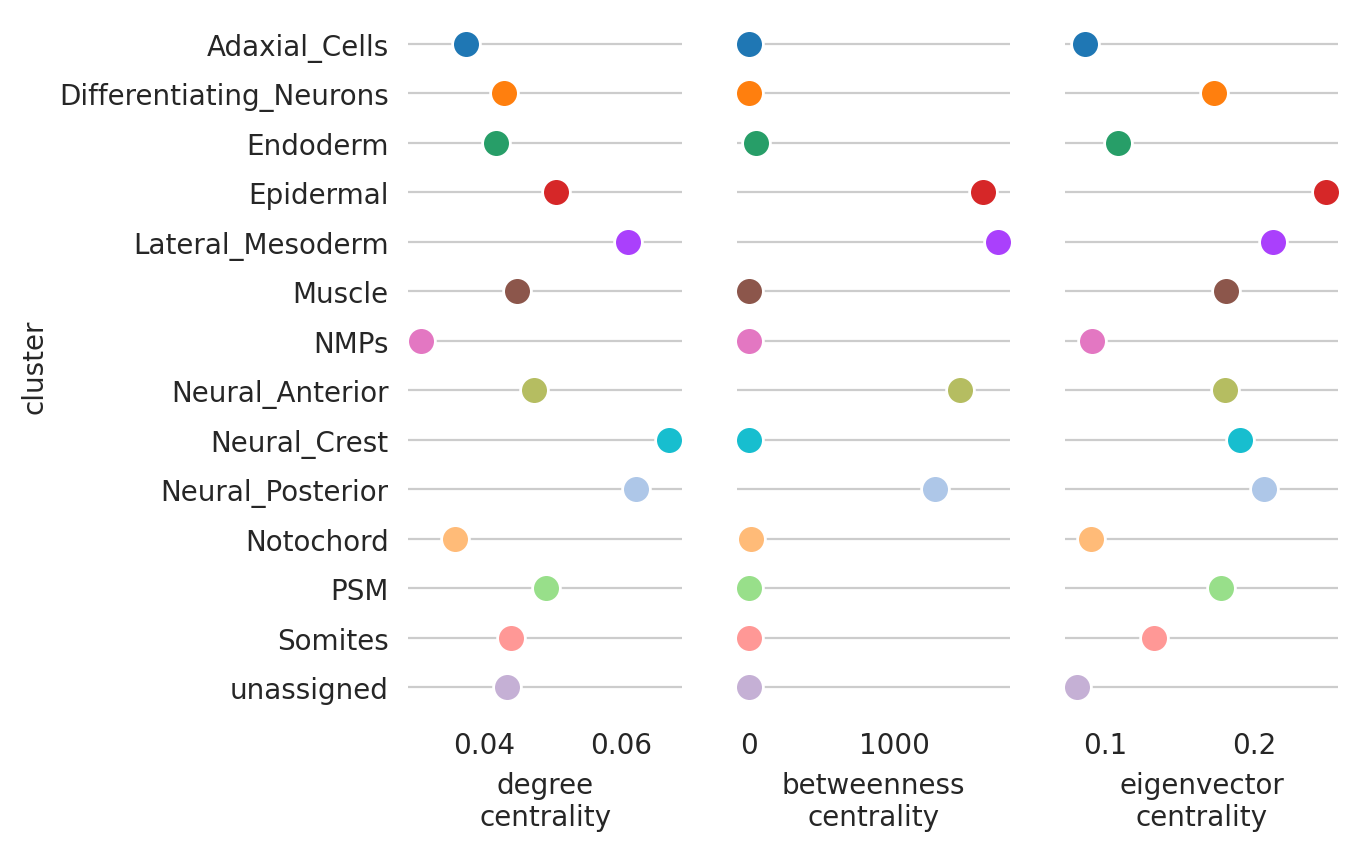

In [75]:
links.plot_score_per_cluster(goi="pax6a")

You can check filtered network edge as follows.

In [76]:
cluster_name = "NMPs"
filtered_links_df = links.filtered_links[cluster_name]
filtered_links_df.head()

source            target  coef_mean  coef_abs             p      -logp
171664  nfatc1             slit3   0.167520  0.167520  6.099314e-13  12.214719
166079  hmga1a  si:ch73-281n10.2   0.134133  0.134133  8.328944e-17  16.079410
171665  creb5b             slit3   0.118250  0.118250  2.857576e-08   7.544002
27748     her9            cirbpa   0.109563  0.109563  5.209617e-10   9.283194
154387   mafbb             rpl7a   0.091194  0.091194  7.477311e-13  12.126255

(array([  4.,   6.,  19., 238.,   0., 479., 963., 190.,  63.,  16.,  10.,
          5.,   2.,   1.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([-0.05427987, -0.04318989, -0.03209991, -0.02100993, -0.00991995,
         0.00117003,  0.01226001,  0.02334999,  0.03443997,  0.04552995,
         0.05661993,  0.06770991,  0.07879989,  0.08988987,  0.10097985,
         0.11206983,  0.12315981,  0.13424979,  0.14533977,  0.15642975,
         0.16751973], dtype=float32),
 <BarContainer object of 20 artists>)

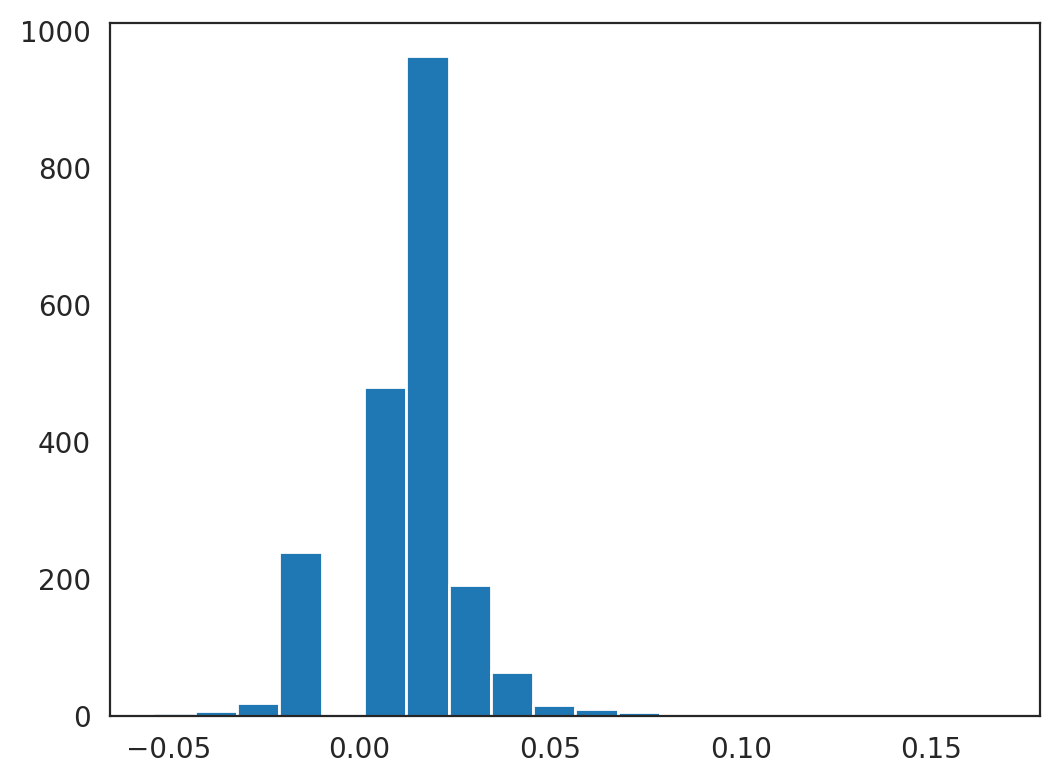

In [79]:
plt.hist(filtered_links_df.coef_mean, bins=20)

## data exploration - with Alejandro on 7/20/2023

In [77]:
filtered_links_df.value_counts()

source  target   coef_mean  coef_abs  p             -logp    
alx4b   actb2     0.011972  0.011972  4.668636e-10  9.330810     1
pax6b   ctnnd2b   0.019362  0.019362  1.399752e-12  11.853949    1
        nova2     0.016700  0.016700  9.239955e-11  10.034330    1
        ncam1b    0.010852  0.010852  7.104874e-07  6.148444     1
        meis1b    0.016022  0.016022  2.720623e-08  7.565332     1
                                                                ..
hoxb3a  notch1a   0.018449  0.018449  2.894996e-13  12.538352    1
        mllt3     0.021569  0.021569  1.653957e-15  14.781476    1
        mki67    -0.010584  0.010584  3.219369e-15  14.492229    1
        lpar1     0.011386  0.011386  4.113130e-11  10.385828    1
zic2b   npm1a     0.016218  0.016218  2.209796e-10  9.655648     1
Name: count, Length: 2000, dtype: int64

In [164]:
links.filtered_links.keys()

dict_keys(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm', 'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs', 'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord', 'PSM', 'Somites', 'unassigned'])

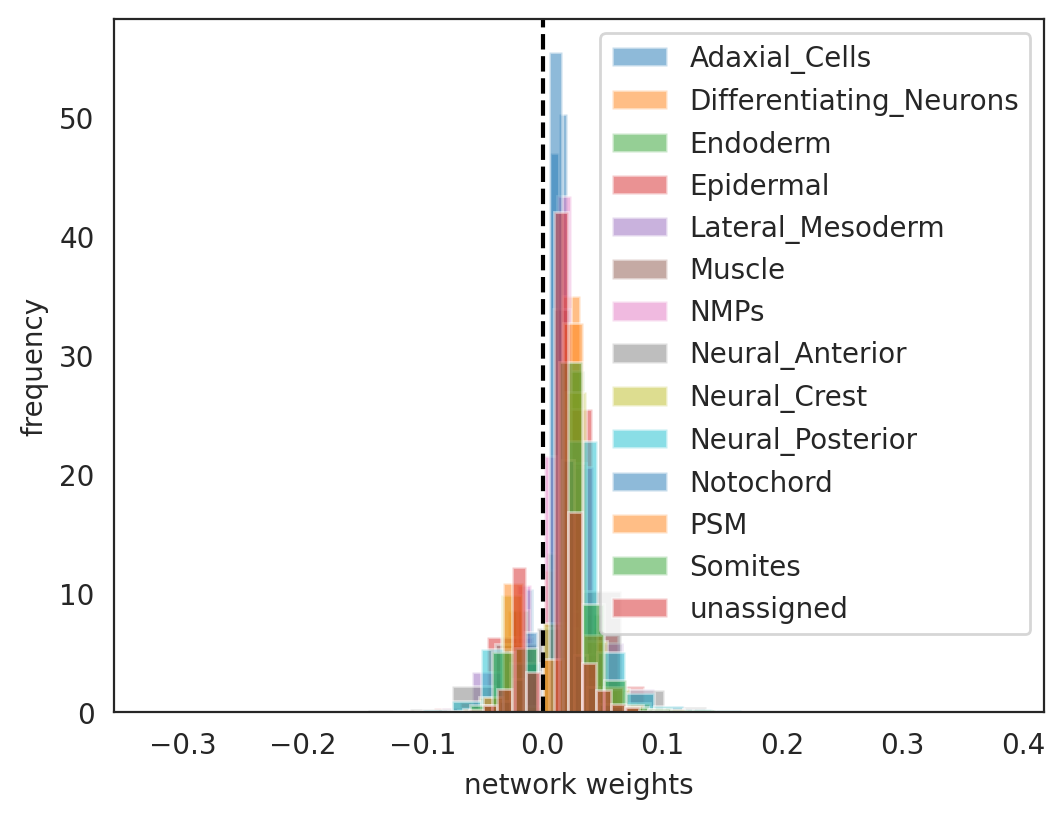

In [80]:
celltypes = links.filtered_links.keys()

plt.figure()

for celltype in celltypes:
    filtered_links_df = links.filtered_links[celltype]
    plt.hist(filtered_links_df["coef_mean"], bins=20, density=True, alpha=0.5, label=celltype)
# Draw a vertical line along the y-axis at x=0
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel("network weights")
plt.ylabel("frequency")
plt.legend()
plt.show()


Text(0, 0.5, 'occurences')

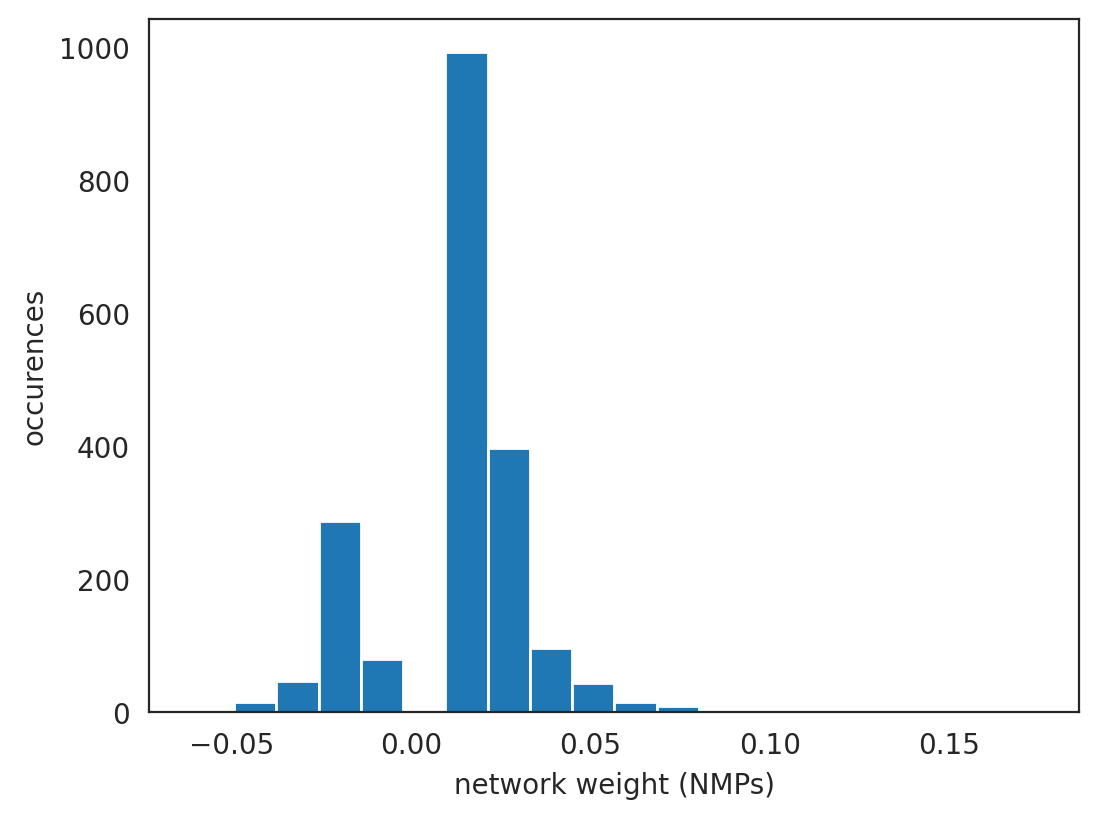

In [81]:
plt.hist(filtered_links_df["coef_mean"], bins=20)
plt.xlabel("network weight (NMPs)")
plt.ylabel("occurences")

Text(0, 0.5, '-log (p_value)')

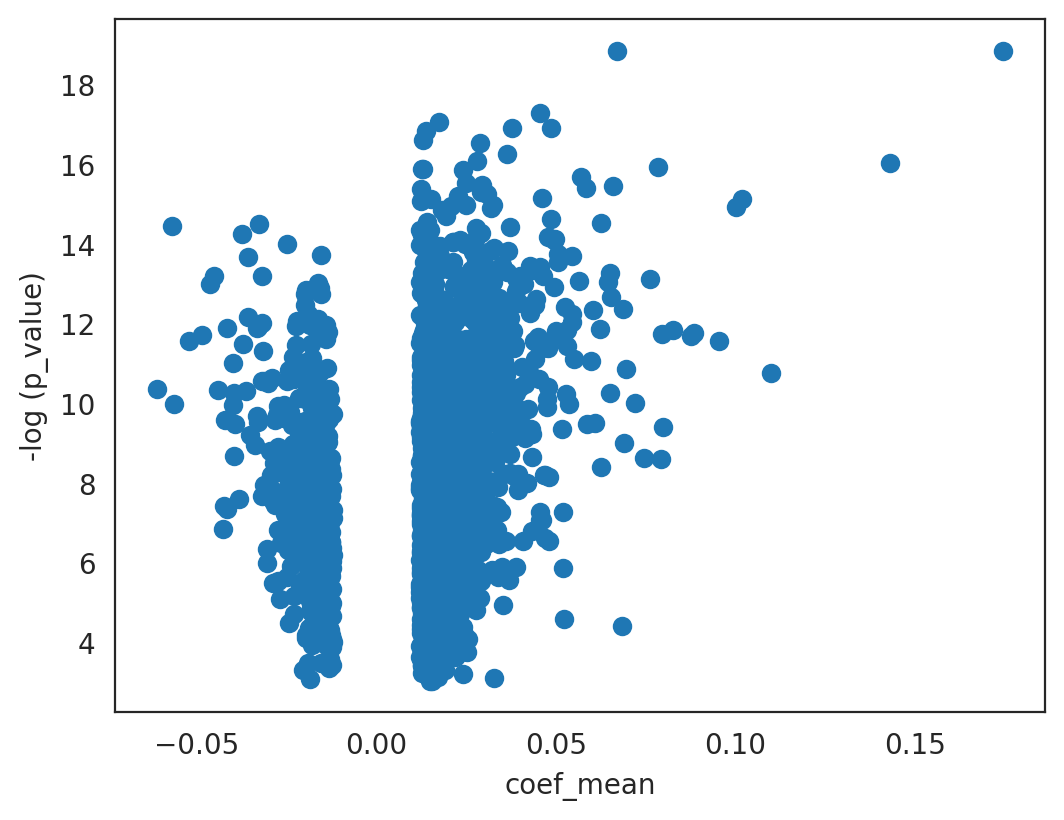

In [82]:
# scatter plot for coef_mean and -log p_value
plt.scatter(filtered_links_df["coef_mean"], filtered_links_df["-logp"])
plt.xlabel("coef_mean")
plt.ylabel("-log (p_value)")

In [85]:
filtered_links_df.sort_values("coef_mean", ascending=False)

source            target  coef_mean  coef_abs             p  \
166079   hmga1a  si:ch73-281n10.2   0.174446  0.174446  1.425083e-19   
154390    mafba             rpl7a   0.142932  0.142932  8.987917e-17   
27799      sox3            cirbpa   0.109816  0.109816  1.673962e-11   
204008   tcf7l2           zbtb16a   0.101832  0.101832  7.442027e-16   
80057    hoxa9b            hmgb2a   0.100233  0.100233  1.158218e-15   
...         ...               ...        ...       ...           ...   
902        etv4             actb1  -0.048603  0.048603  1.953311e-12   
80046   twist1a            hmgb2a  -0.052350  0.052350  2.649423e-12   
8599       mnx1             apoc1  -0.056478  0.056478  1.026318e-10   
8598       gbx2             apoc1  -0.057092  0.057092  3.540801e-15   
161790    six1b           serbp1a  -0.061112  0.061112  4.334704e-11   

            -logp  
166079  18.846160  
154390  16.046341  
27799   10.776255  
204008  15.128309  
80057   14.936210  
...           ...  
902     11.709229  
80046   11.576849  
8599     9.988718  
8598    14.450898  
161790  10.363041  

[2000 rows x 6 columns]

You can confirm that there is no Cebpa connection in Ery_0 cluster.

In [86]:
filtered_links_df[filtered_links_df.source == "sox3"]

source            target  coef_mean  coef_abs             p      -logp
27799    sox3            cirbpa   0.109816  0.109816  1.673962e-11  10.776255
166096   sox3  si:ch73-281n10.2   0.068364  0.068364  3.746339e-05   4.426393
80389    sox3             hmgn2   0.049725  0.049725  7.330988e-15  14.134838
161827   sox3           serbp1a   0.047821  0.047821  4.091331e-12  11.388135
81372    sox3          hnrnpaba   0.042871  0.042871  5.391655e-13  12.268278
85201    sox3          hsp90ab1   0.037212  0.037212  3.727392e-15  14.428595
146434   sox3             ptmab   0.034544  0.034544  4.295737e-13  12.366962
204015   sox3           zbtb16a   0.033184  0.033184  8.822935e-09   8.054387
154624   sox3             rps20   0.030775  0.030775  5.454068e-16  15.263279
26163    sox3              cfl1   0.024636  0.024636  1.006169e-14  13.997329
31827    sox3          col18a1a   0.022645  0.022645  7.340447e-14  13.134278
190637   sox3            tmsb4x   0.022561  0.022561  1.601648e-08   7.795433
124481   sox3             nova2   0.021925  0.021925  5.309203e-14  13.274971
196346   sox3            tubb2b   0.021374  0.021374  1.370980e-11  10.862969
196469   sox3            tubb4b   0.021003  0.021003  1.573776e-08   7.803057
48827    sox3          eef1a1l1   0.019921  0.019921  3.846947e-12  11.414884
1117     sox3             actb2   0.019167  0.019167  4.060796e-10   9.391389
946      sox3             actb1  -0.018842  0.018842  1.260648e-07   6.899406
107721   sox3              mdka   0.017026  0.017026  7.101908e-09   8.148625
174695   sox3             sox13   0.016018  0.016018  2.727081e-11  10.564302
40775    sox3              dag1   0.015530  0.015530  1.455586e-14  13.836962
123540   sox3             nop58   0.015262  0.015262  1.021965e-11  10.990564
195694   sox3            tuba1a   0.013486  0.013486  4.394860e-14  13.357055
57705    sox3             fabp3   0.013426  0.013426  1.482984e-10   9.828864
65079    sox3             foxp4   0.013239  0.013239  3.548933e-08   7.449902

## 7.4. Gene cartography analysis

Gene cartography is a method for gene network analysis.
The method classifies gene into several groups using the network module structure and connections.
It provides us an insight about the role and regulatory mechanism for each gene. 
For more information on gene cartography, please refer to the following paper (https://www.nature.com/articles/nature03288).

The gene cartography will be calculated for the GRN in each cluster.
Thus we can know how the gene cartography change by comparing the the score between clusters.

/home/yang-joon.kim/.local/lib/python3.8/site-packages/celloracle/network_analysis/links_object.py:394: DeprecationWarning: This is the deprecated function. This function will be removed in the future version.
  warnings.warn(


Adaxial_Cells


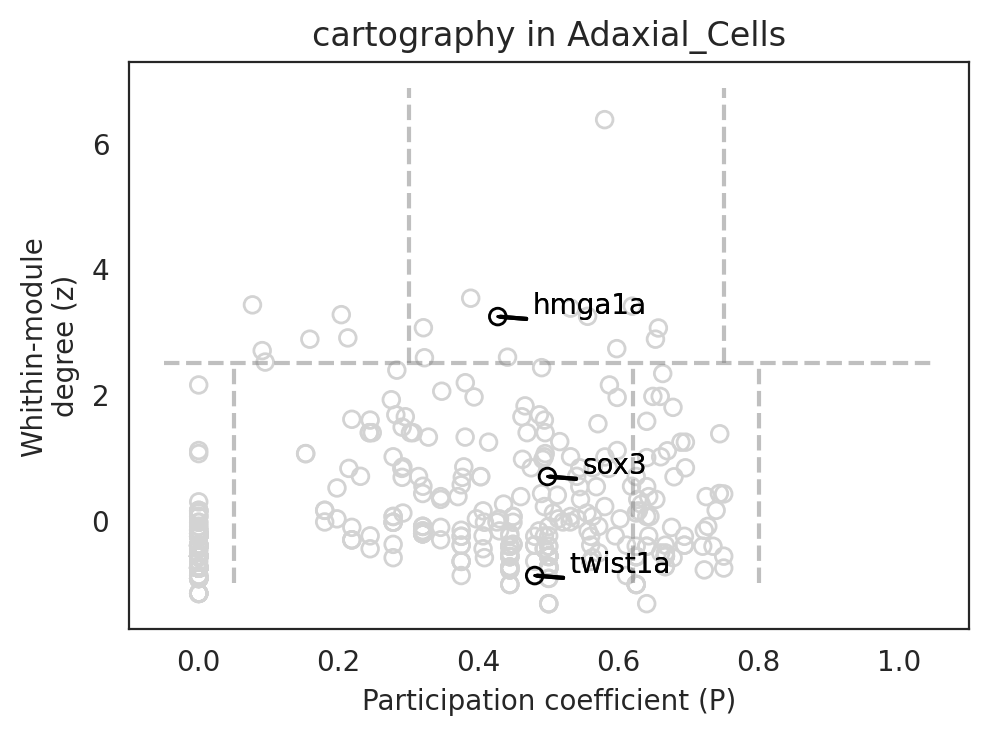

Differentiating_Neurons


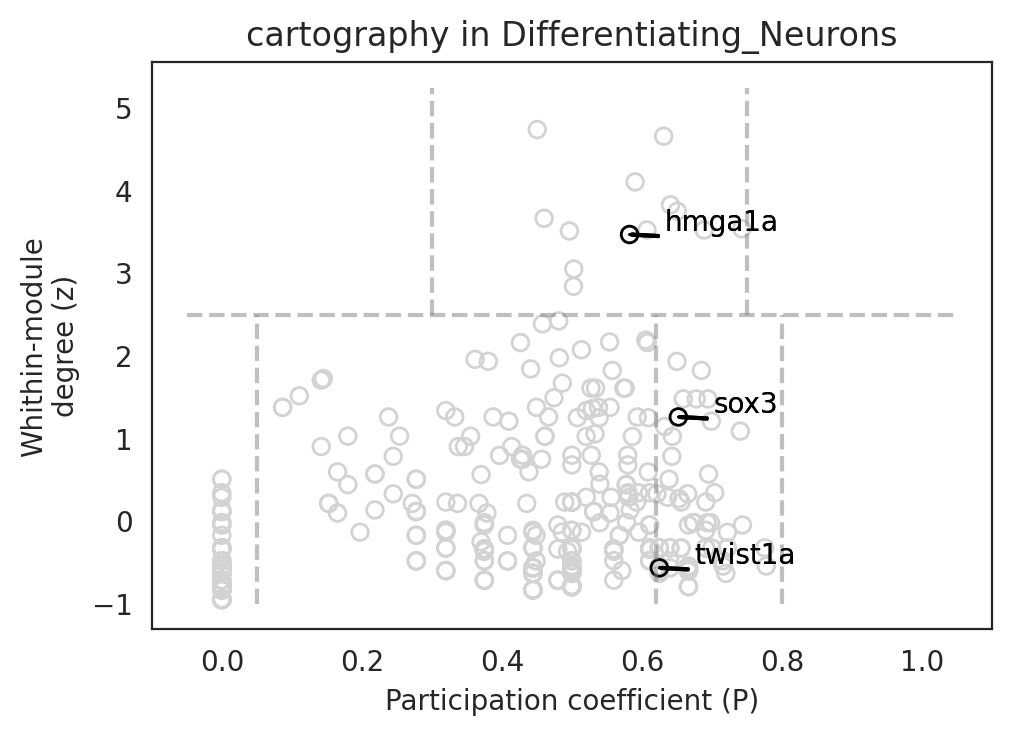

Endoderm


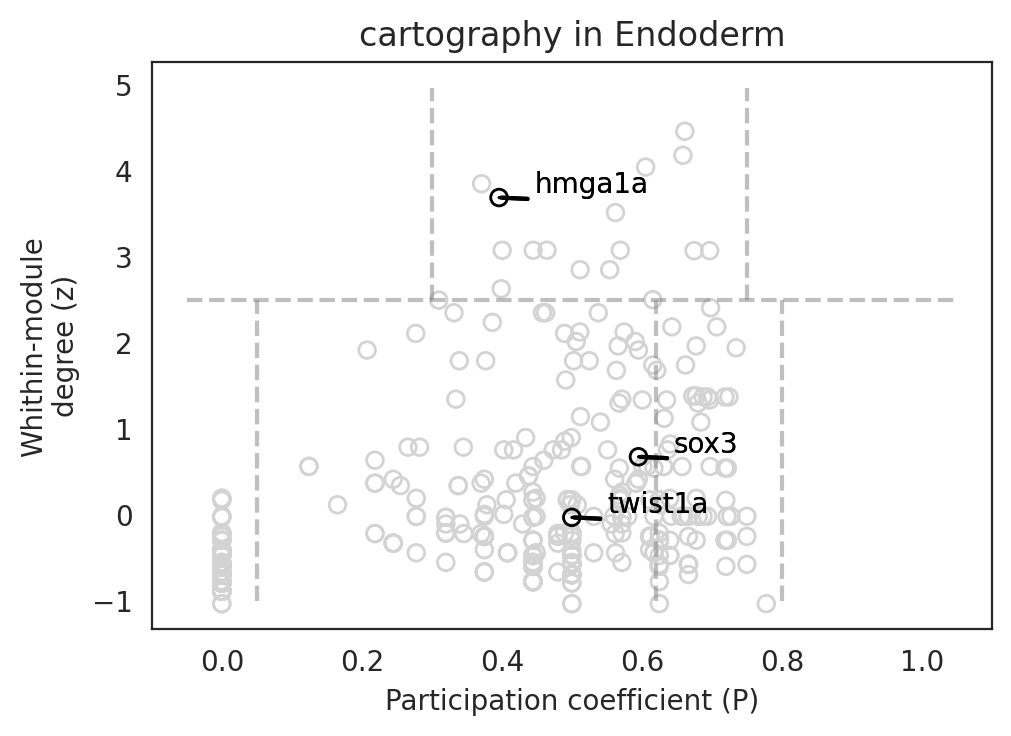

Epidermal


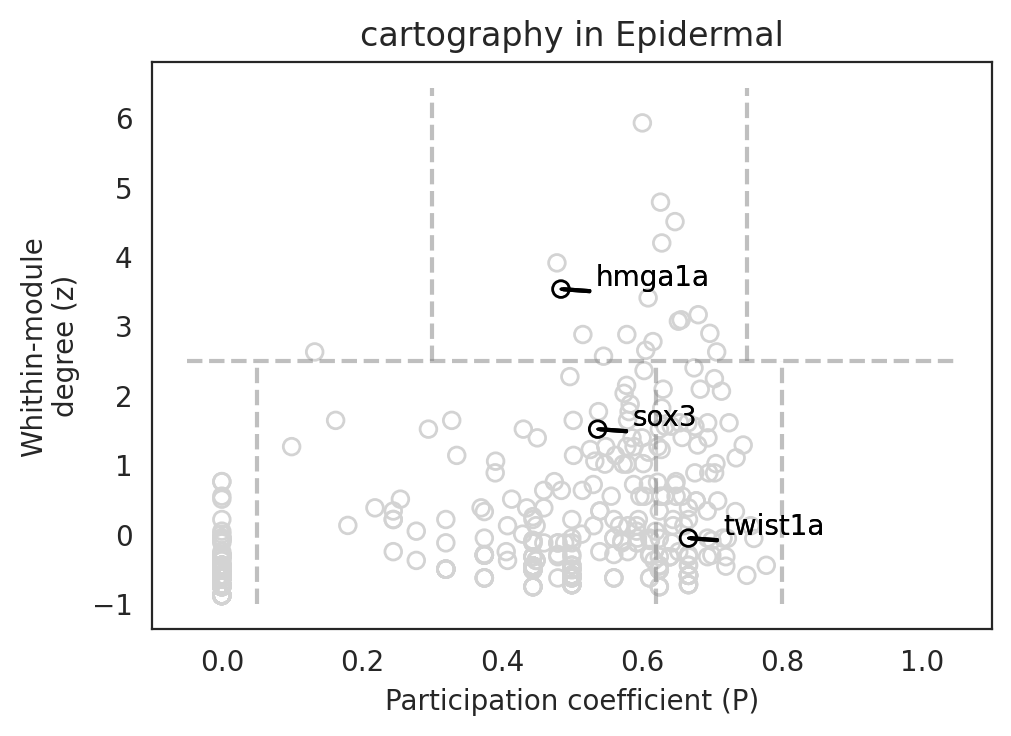

Lateral_Mesoderm


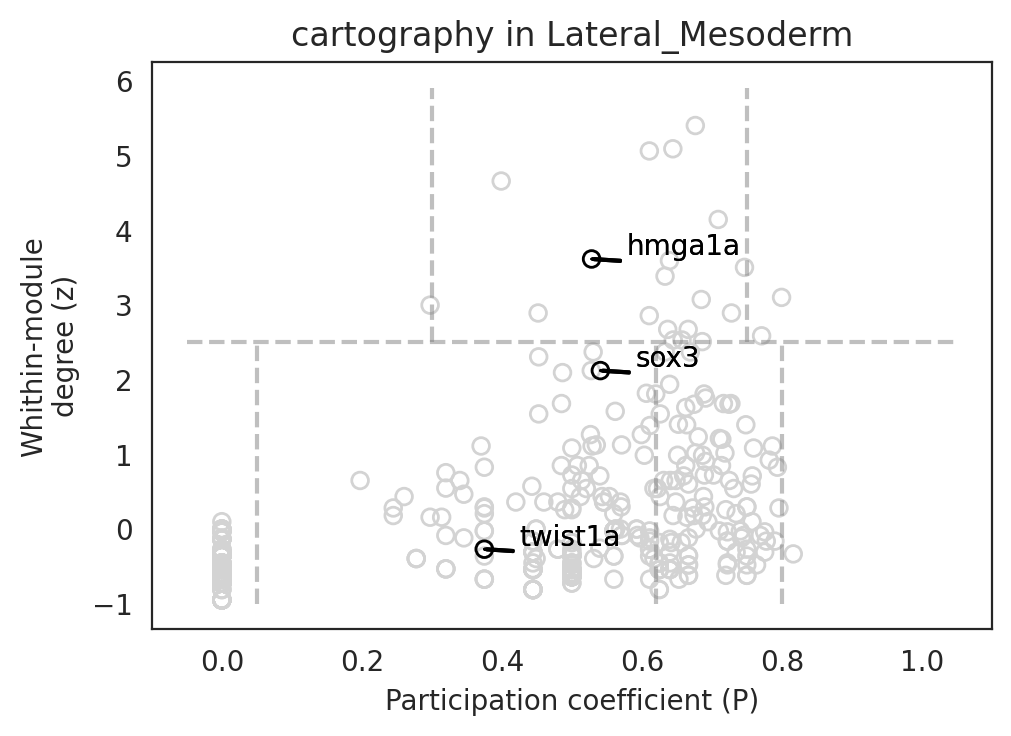

Muscle


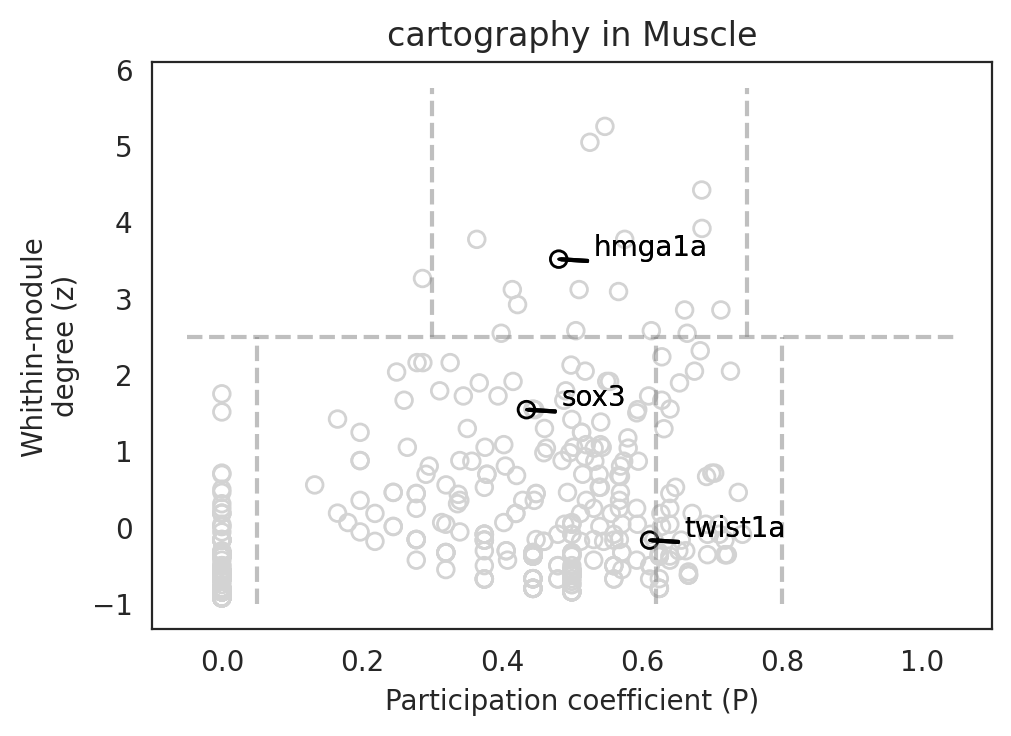

NMPs


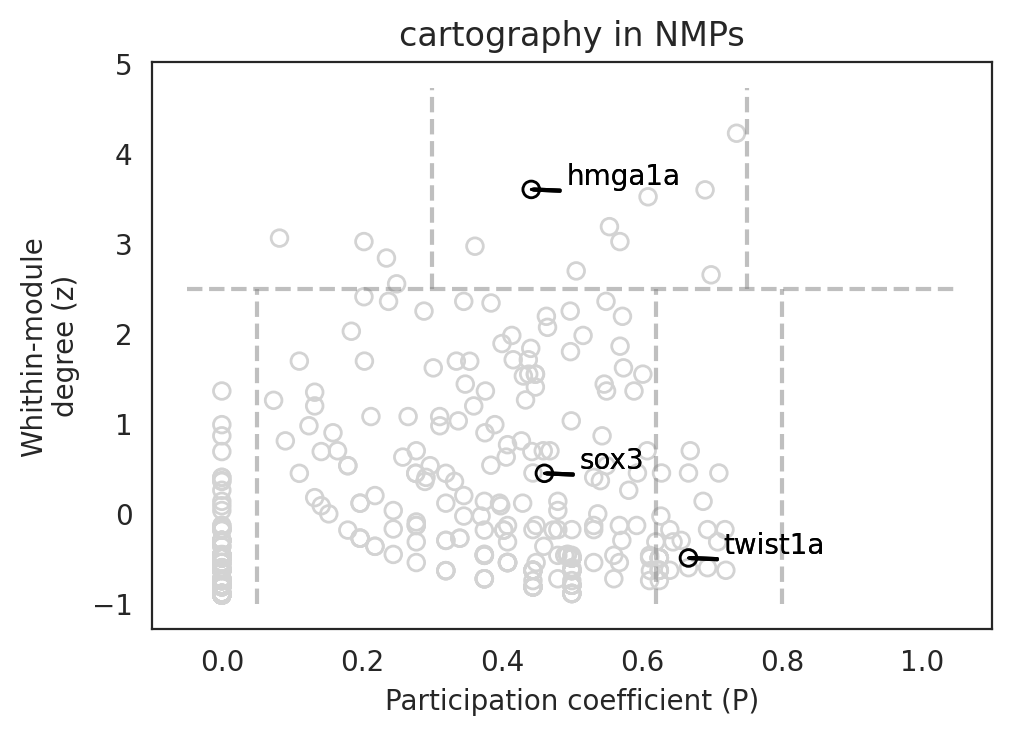

Neural_Anterior


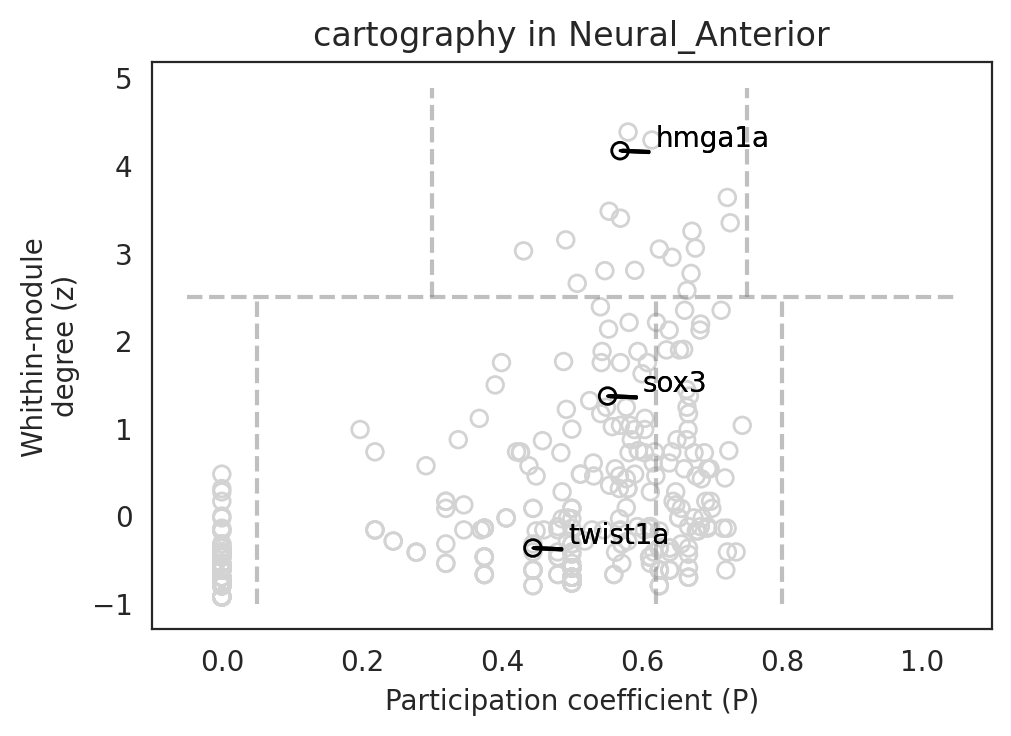

Neural_Crest


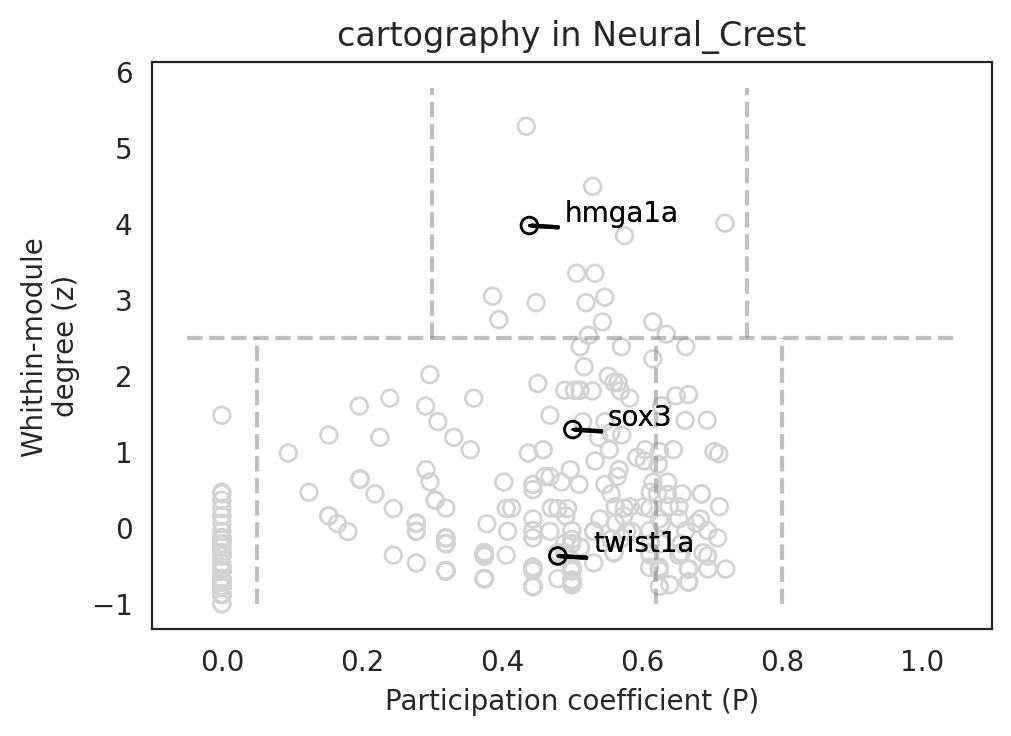

Neural_Posterior


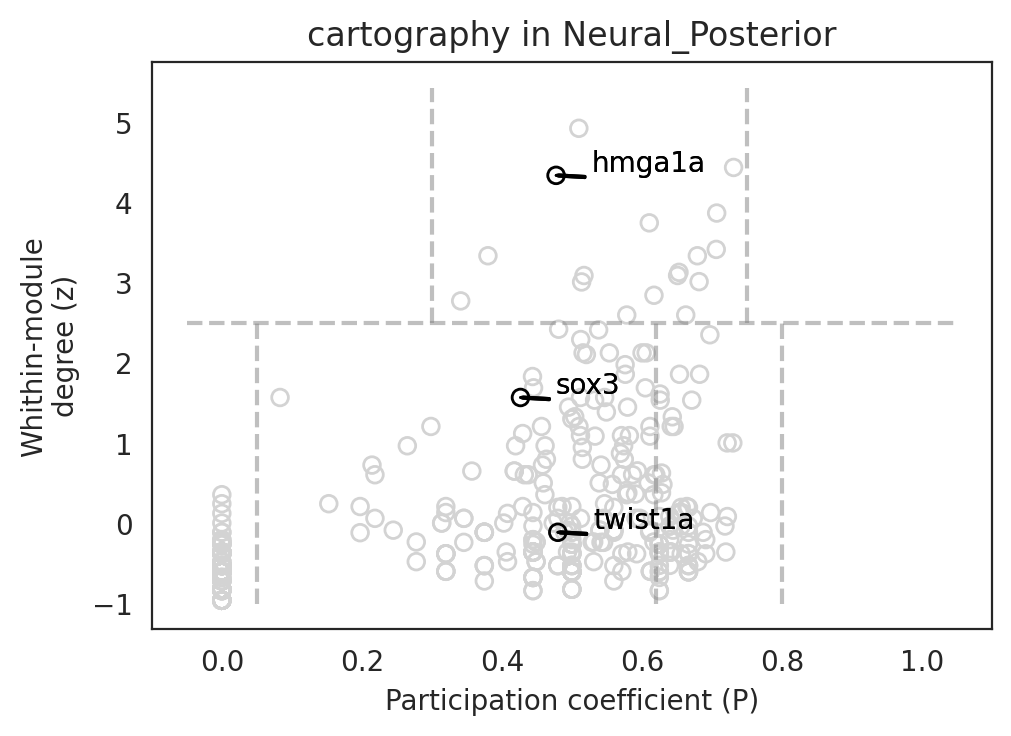

Notochord


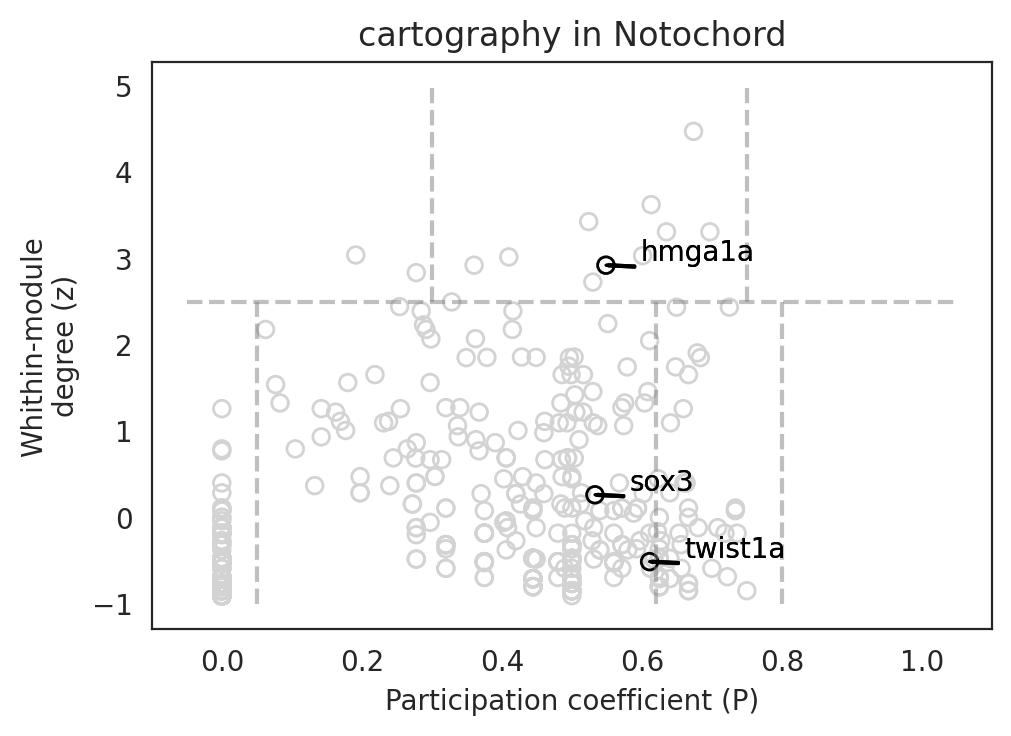

PSM


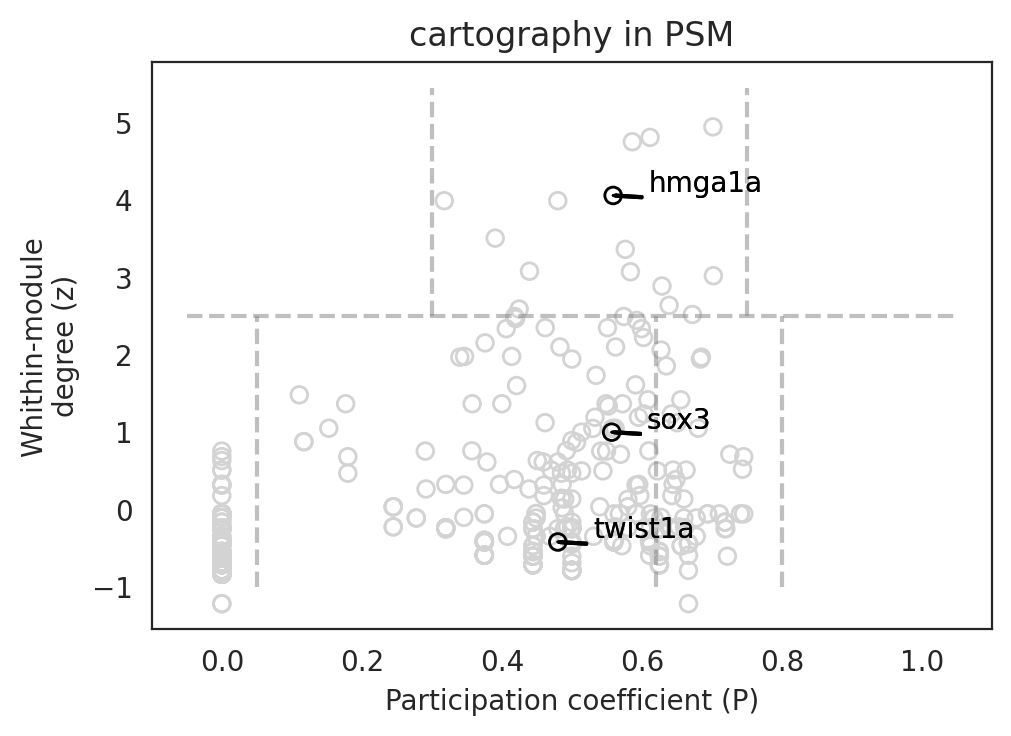

Somites


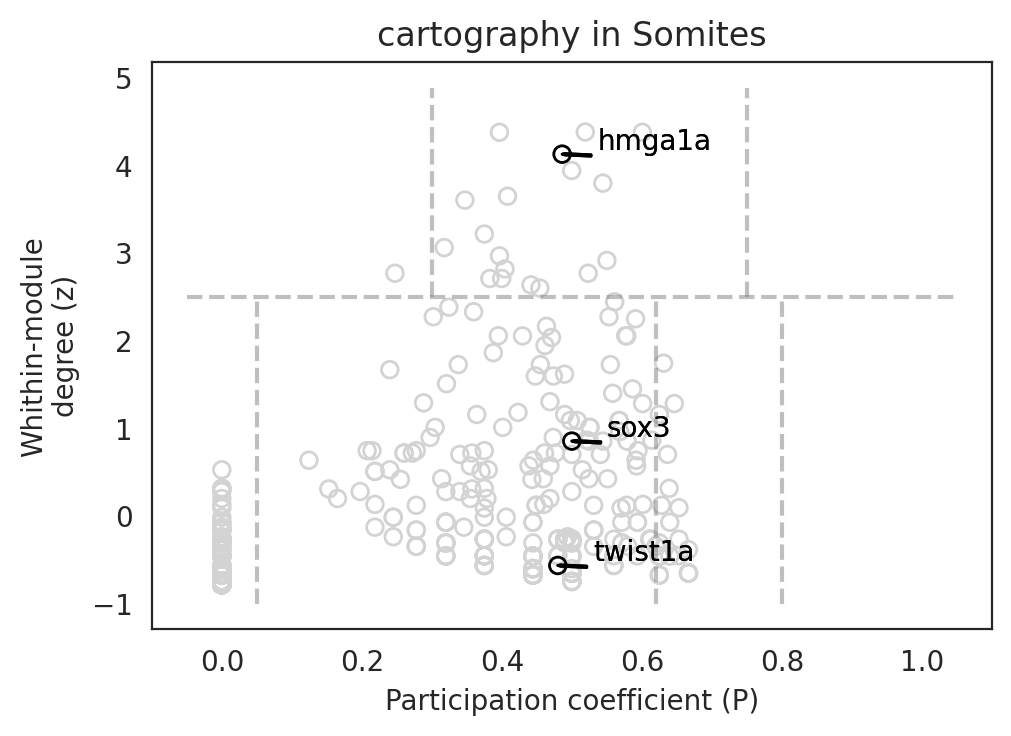

unassigned


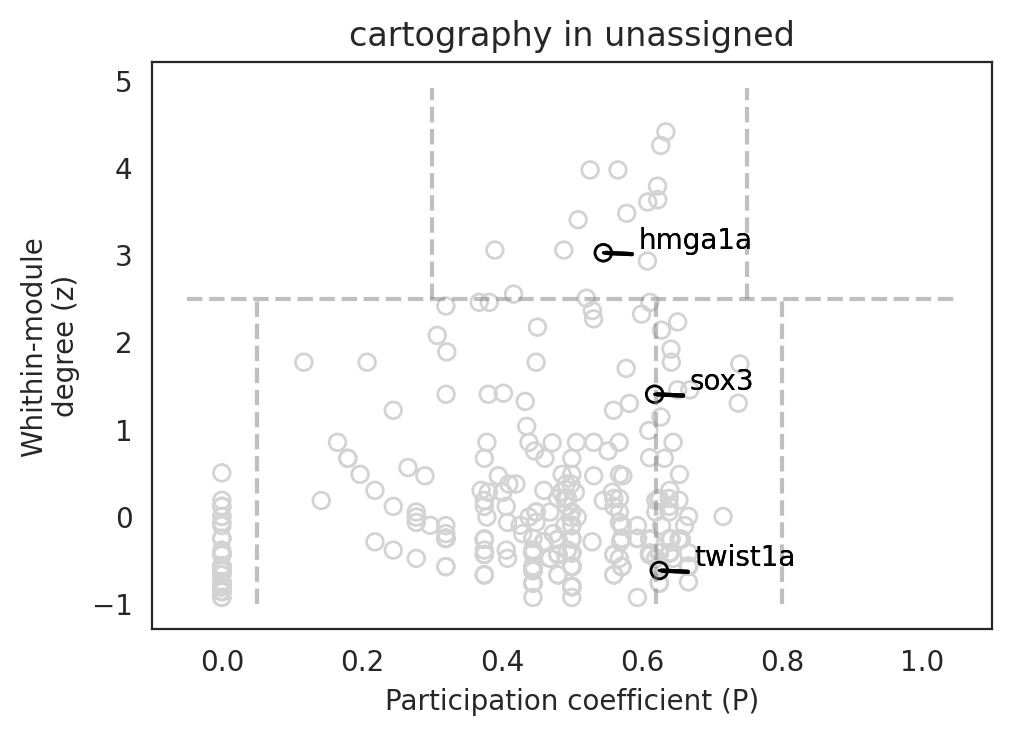

In [87]:
# Plot cartography as a scatter plot
links.plot_cartography_scatter_per_cluster(scatter=True,
                                           kde=False,
                                           gois=["hmga1a", "sox3", "twist1a"],
                                           auto_gene_annot=False,
                                           args_dot={"n_levels": 105},
                                           args_line={"c":"gray"}) #, save="TDR118_15somite_GRN_coarse_celltypes/cartography")

In [90]:
output_filepath

'/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/'

In [92]:
# # Plot the summary of cartography analysis
# links.plot_cartography_term(goi="sox3", save= output_filepath + "figures_danRer11/cartography")

# 8. Network analysis; network score distribution

Next, we visualize the distribution of network score to get insight into the global trend of the GRNs.

## 8.1. Distribution of network degree

degree_centrality_all


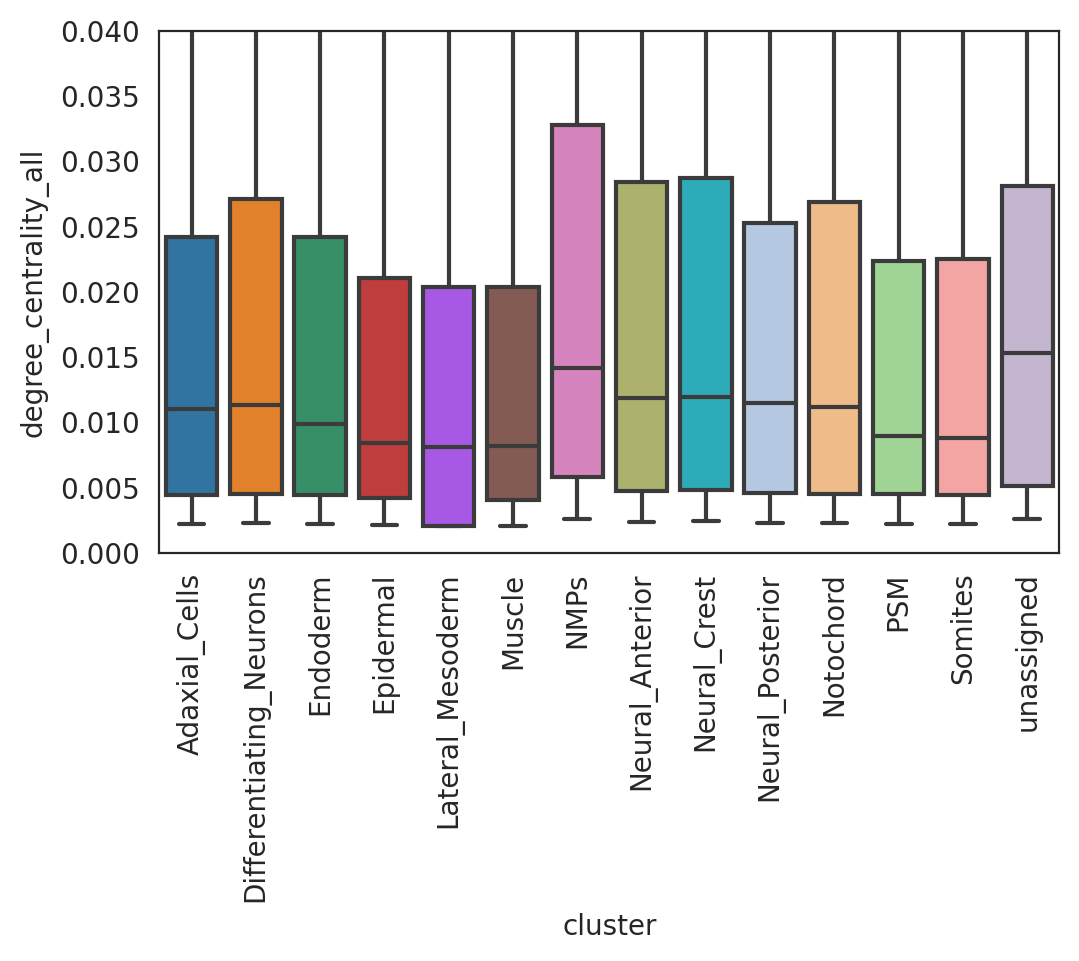

In [93]:
plt.subplots_adjust(left=0.15, bottom=0.3)
plt.ylim([0,0.040])
links.plot_score_discributions(values=["degree_centrality_all"], method="boxplot")#, save="TDR118_15somite_GRN_coarse_celltypes")



eigenvector_centrality


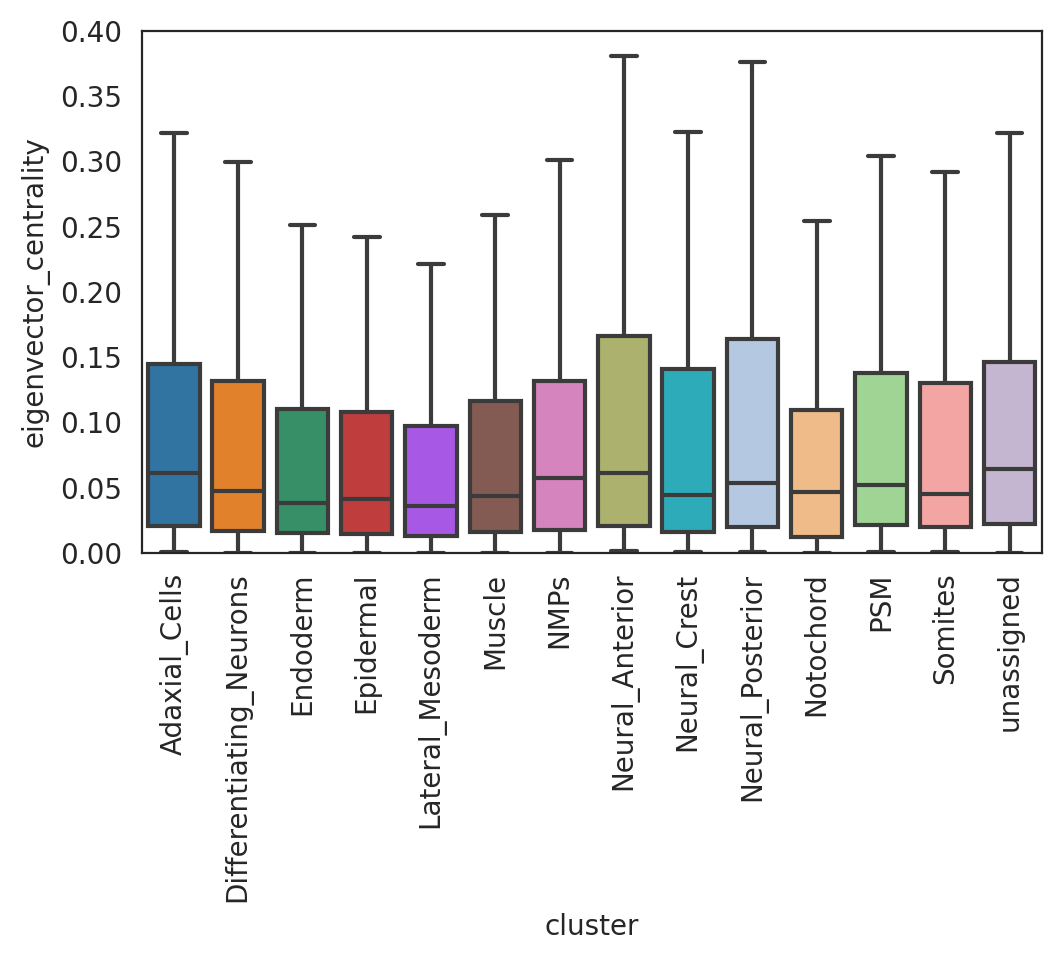

In [94]:
plt.subplots_adjust(left=0.15, bottom=0.3)
plt.ylim([0, 0.40])
links.plot_score_discributions(values=["eigenvector_centrality"], method="boxplot")# , save="TDR118_15somite_GRN_coarse_celltypes")




## 8.2. Distribution of netowrk entropy

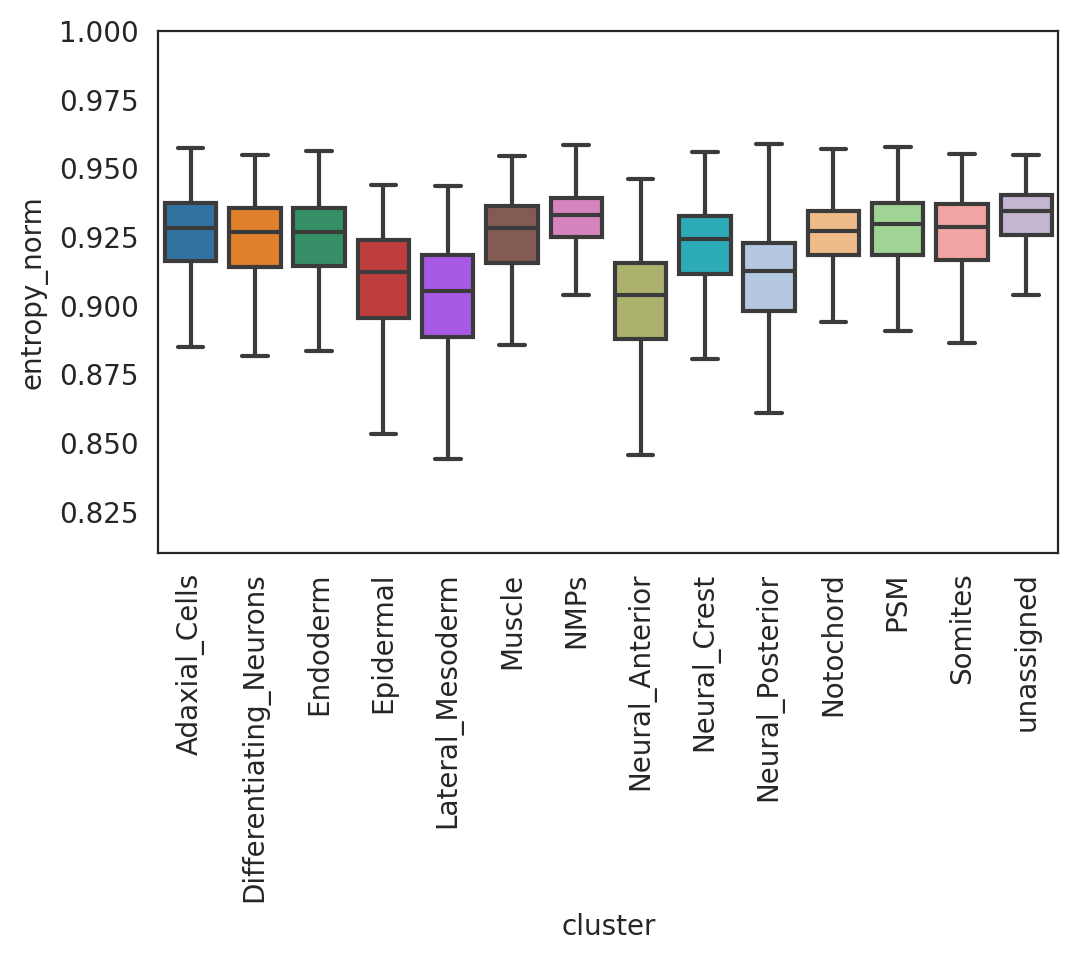

In [95]:
plt.subplots_adjust(left=0.15, bottom=0.3)
links.plot_network_entropy_distributions() #(save="TDR118_15somite_GRN_coarse_celltypes")



Using the network scores, we could pick up cluster-specific key TFs.
Gata2, Gata1, Klf1, E2f1, for example, are known to play an essential role in MEP, and these TFs showed high network score in our GRN.

However, it is important to note that network analysis alone cannot shed light on the specific functions or roles these TFs play in cell fate determination. 

In the next section, we will begin to investigate each TF’s contribution to cell fate by running GRN simulations

In [12]:
# extract filtered GRNs (filtered_links) as "dictionary"
dict_GRN_16hpf = GRN_16hpf.filtered_links
dict_GRN_16hpf

dict_GRN_19hpf = GRN_19hpf.filtered_links
dict_GRN_19hpf

dict_GRN_24hpf = GRN_24hpf.filtered_links
dict_GRN_24hpf

{'Adaxial_Cells':         source    target  coef_mean  coef_abs             p      -logp
 64807   nr2f1b    hmgb2a   0.107982  0.107982  1.847119e-13  12.733505
 64957   hmga1a     hmgn2   0.107153  0.107153  1.941999e-16  15.711751
 129220    tp53   serbp1a   0.102069  0.102069  4.345155e-14  13.361995
 151333  sox21a    tmsb4x   0.086323  0.086323  2.243270e-12  11.649119
 68468   hmga1a  hsp90ab1   0.085411  0.085411  5.726644e-20  19.242100
 ...        ...       ...        ...       ...           ...        ...
 98065    isl2b     nop56   0.009157  0.009157  2.744661e-04   3.561511
 61321    pax7a     hbbe3  -0.009153  0.009153  1.496054e-07   6.825053
 123758    lhx6     rplp0   0.009149  0.009149  7.993036e-05   4.097288
 22536    pax3a      cdon   0.009147  0.009147  1.384234e-04   3.858791
 68391    sox9a  hsp90ab1   0.009142  0.009142  7.577885e-04   3.120452
 
 [2000 rows x 6 columns],
 'Differentiating_Neurons':         source    target  coef_mean  coef_abs             p    

In [15]:
dict_GRN_16hpf.keys()

dict_keys(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm', 'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs', 'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord', 'PSM', 'Somites', 'unassigned'])

In [16]:
dict_GRN_19hpf.keys()

dict_keys(['Differentiating_Neurons', 'Endoderm', 'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs', 'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord', 'PSM', 'Somites', 'unassigned'])

In [17]:
dict_GRN_24hpf.keys()

dict_keys(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm', 'Epidermal', 'Muscle', 'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'PSM', 'Somites', 'unassigned'])

In [29]:
# Choose a cell-type of interest (that is present for all timepoints)
# Note that we will have to consider the edge case where the celltype is only transient for specific timepoints
ct = "PSM"

dict_GRN_16hpf[ct]

GRN_16hpf.merged_score[GRN_16hpf.merged_score["cluster"]==ct].sort_values("degree_centrality_all", ascending=False)

degree_all  degree_in  degree_out  clustering_coefficient  \
meox1            77         16          61                0.064688   
hmga1a           66         47          19                0.040385   
apoc1            65         65           0                0.019712   
hoxb3a           54         10          44                0.097518   
apoeb            49         49           0                0.020408   
...             ...        ...         ...                     ...   
tjp2b             1          1           0                0.000000   
foxi3a            1          0           1                0.000000   
gcm2              1          0           1                0.000000   
onecut1           1          0           1                0.000000   
robo3             1          1           0                0.000000   

         clustering_coefficient_weighted  degree_centrality_all  \
meox1                           0.069812               0.171875   
hmga1a                          0.066425               0.147321   
apoc1                           0.030708               0.145089   
hoxb3a                          0.105866               0.120536   
apoeb                           0.025567               0.109375   
...                                  ...                    ...   
tjp2b                           0.000000               0.002232   
foxi3a                          0.000000               0.002232   
gcm2                            0.000000               0.002232   
onecut1                         0.000000               0.002232   
robo3                           0.000000               0.002232   

         degree_centrality_in  degree_centrality_out  betweenness_centrality  \
meox1                0.035714               0.136161                   10509   
hmga1a               0.104911               0.042411                    6481   
apoc1                0.145089               0.000000                       0   
hoxb3a               0.022321               0.098214                    3008   
apoeb                0.109375               0.000000                       0   
...                       ...                    ...                     ...   
tjp2b                0.002232               0.000000                       0   
foxi3a               0.000000               0.002232                       0   
gcm2                 0.000000               0.002232                       0   
onecut1              0.000000               0.002232                       0   
robo3                0.002232               0.000000                       0   

         closeness_centrality  eigenvector_centrality  page_rank  \
meox1                0.100778                1.000000   0.003327   
hmga1a               0.051747                0.976142   0.012195   
apoc1                     NaN                0.773270   0.021161   
hoxb3a               0.089543                0.629265   0.002715   
apoeb                     NaN                0.414441   0.014596   
...                       ...                     ...        ...   
tjp2b                     NaN                0.039810   0.001475   
foxi3a              47.713347                0.012040   0.001432   
gcm2                49.841032                0.013915   0.001432   
onecut1              0.067257                0.013537   0.001432   
robo3                     NaN                0.012931   0.001459   

         assortative_coefficient  average_path_length  community_random_walk  \
meox1                  -0.278757             0.089486                      1   
hmga1a                 -0.278757             0.089486                      4   
apoc1                  -0.278757             0.089486                      4   
hoxb3a                 -0.278757             0.089486                      1   
apoeb                  -0.278757             0.089486                      4   
...                          ...                  ...                    ...   
tjp2b                  -0

In [31]:
ct = "PSM"

GRN_19hpf.merged_score[GRN_19hpf.merged_score["cluster"]==ct].sort_values("degree_centrality_all", ascending=False)

degree_all  degree_in  degree_out  clustering_coefficient  \
meox1           66         10          56                0.047115   
meis1b          66         17          49                0.092166   
apoc1           63         63           0                0.014337   
hmga1a          61         30          31                0.093443   
rxraa           53         15          38                0.111702   
...            ...        ...         ...                     ...   
hand2            1          0           1                0.000000   
tp73             1          0           1                0.000000   
dlx4a            1          0           1                0.000000   
tp63             1          0           1                0.000000   
efnb2a           1          1           0                0.000000   

        clustering_coefficient_weighted  degree_centrality_all  \
meox1                          0.058276               0.141631   
meis1b                         0.105778               0.141631   
apoc1                          0.019224               0.135193   
hmga1a                         0.119594               0.130901   
rxraa                          0.131984               0.113734   
...                                 ...                    ...   
hand2                          0.000000               0.002146   
tp73                           0.000000               0.002146   
dlx4a                          0.000000               0.002146   
tp63                           0.000000               0.002146   
efnb2a                         0.000000               0.002146   

        degree_centrality_in  degree_centrality_out  betweenness_centrality  \
meox1               0.021459               0.120172                    2006   
meis1b              0.036481               0.105150                    6910   
apoc1               0.135193               0.000000                       0   
hmga1a              0.064378               0.066524                    4550   
rxraa               0.032189               0.081545                    8084   
...                      ...                    ...                     ...   
hand2               0.000000               0.002146                       0   
tp73                0.000000               0.002146                       0   
dlx4a               0.000000               0.002146                       0   
tp63                0.000000               0.002146                       0   
efnb2a              0.002146               0.000000                       0   

        closeness_centrality  eigenvector_centrality  page_rank  \
meox1               0.110970                1.000000   0.004245   
meis1b              0.119120                0.717997   0.003852   
apoc1                    NaN                0.771168   0.021658   
hmga1a              0.063072                0.959630   0.007888   
rxraa               0.097898                0.922249   0.004217   
...                      ...                     ...        ...   
hand2              79.635835                0.008655   0.001426   
tp73                0.088650                0.017790   0.001426   
dlx4a              75.111678                0.005264   0.001426   
tp63                0.057291                0.008221   0.001426   
efnb2a                   NaN                0.011427   0.001438   

        assortative_coefficient  average_path_length  community_random_walk  \
meox1                 -0.244645             0.068915                      2   
meis1b                -0.244645             0.068915                      2   
apoc1                 -0.244645             0.068915                      5   
hmga1a                -0.244645             0.068915                      4   
rxraa                 -0.244645             0.068915                      2   
...                         ...                  ...                    ...   
hand2                 -0.244645             0.068915                     24   


In [32]:
ct = "PSM"

GRN_19hpf.merged_score[GRN_19hpf.merged_score["cluster"]==ct].sort_values("degree_centrality_all", ascending=False)

degree_all  degree_in  degree_out  clustering_coefficient  \
meox1           66         10          56                0.047115   
meis1b          66         17          49                0.092166   
apoc1           63         63           0                0.014337   
hmga1a          61         30          31                0.093443   
rxraa           53         15          38                0.111702   
...            ...        ...         ...                     ...   
hand2            1          0           1                0.000000   
tp73             1          0           1                0.000000   
dlx4a            1          0           1                0.000000   
tp63             1          0           1                0.000000   
efnb2a           1          1           0                0.000000   

        clustering_coefficient_weighted  degree_centrality_all  \
meox1                          0.058276               0.141631   
meis1b                         0.105778               0.141631   
apoc1                          0.019224               0.135193   
hmga1a                         0.119594               0.130901   
rxraa                          0.131984               0.113734   
...                                 ...                    ...   
hand2                          0.000000               0.002146   
tp73                           0.000000               0.002146   
dlx4a                          0.000000               0.002146   
tp63                           0.000000               0.002146   
efnb2a                         0.000000               0.002146   

        degree_centrality_in  degree_centrality_out  betweenness_centrality  \
meox1               0.021459               0.120172                    2006   
meis1b              0.036481               0.105150                    6910   
apoc1               0.135193               0.000000                       0   
hmga1a              0.064378               0.066524                    4550   
rxraa               0.032189               0.081545                    8084   
...                      ...                    ...                     ...   
hand2               0.000000               0.002146                       0   
tp73                0.000000               0.002146                       0   
dlx4a               0.000000               0.002146                       0   
tp63                0.000000               0.002146                       0   
efnb2a              0.002146               0.000000                       0   

        closeness_centrality  eigenvector_centrality  page_rank  \
meox1               0.110970                1.000000   0.004245   
meis1b              0.119120                0.717997   0.003852   
apoc1                    NaN                0.771168   0.021658   
hmga1a              0.063072                0.959630   0.007888   
rxraa               0.097898                0.922249   0.004217   
...                      ...                     ...        ...   
hand2              79.635835                0.008655   0.001426   
tp73                0.088650                0.017790   0.001426   
dlx4a              75.111678                0.005264   0.001426   
tp63                0.057291                0.008221   0.001426   
efnb2a                   NaN                0.011427   0.001438   

        assortative_coefficient  average_path_length  community_random_walk  \
meox1                 -0.244645             0.068915                      2   
meis1b                -0.244645             0.068915                      2   
apoc1                 -0.244645             0.068915                      5   
hmga1a                -0.244645             0.068915                      4   
rxraa                 -0.244645             0.068915                      2   
...                         ...                  ...                    ...   
hand2                 -0.244645             0.068915                     24   


In [34]:
ct = "PSM"

GRN_24hpf.merged_score[GRN_24hpf.merged_score["cluster"]==ct].sort_values("degree_centrality_all", ascending=False)

degree_all  degree_in  degree_out  clustering_coefficient  \
hmga1a            86         65          21                0.083447   
actb1             70         70           0                0.014907   
hsp90ab1          68         68           0                0.021071   
ptmab             67         67           0                0.007237   
hmgn2             61         61           0                0.026230   
...              ...        ...         ...                     ...   
cygb1              1          1           0                0.000000   
traf4a             1          1           0                0.000000   
colec12            1          1           0                0.000000   
slc6a8             1          1           0                0.000000   
ek1                1          1           0                0.000000   

          clustering_coefficient_weighted  degree_centrality_all  \
hmga1a                           0.093731               0.231183   
actb1                            0.020163               0.188172   
hsp90ab1                         0.028409               0.182796   
ptmab                            0.008942               0.180108   
hmgn2                            0.039394               0.163978   
...                                   ...                    ...   
cygb1                            0.000000               0.002688   
traf4a                           0.000000               0.002688   
colec12                          0.000000               0.002688   
slc6a8                           0.000000               0.002688   
ek1                              0.000000               0.002688   

          degree_centrality_in  degree_centrality_out  betweenness_centrality  \
hmga1a                0.174731               0.056452                    1221   
actb1                 0.188172               0.000000                       0   
hsp90ab1              0.182796               0.000000                       0   
ptmab                 0.180108               0.000000                       0   
hmgn2                 0.163978               0.000000                       0   
...                        ...                    ...                     ...   
cygb1                 0.002688               0.000000                       0   
traf4a                0.002688               0.000000                       0   
colec12               0.002688               0.000000                       0   
slc6a8                0.002688               0.000000                       0   
ek1                   0.002688               0.000000                       0   

          closeness_centrality  eigenvector_centrality  page_rank  \
hmga1a                3.084511                1.000000   0.016021   
actb1                      NaN                0.491866   0.018411   
hsp90ab1                   NaN                0.632795   0.017102   
ptmab                      NaN                0.594568   0.011915   
hmgn2                      NaN                0.695886   0.009717   
...                        ...                     ...        ...   
cygb1                      NaN                0.002228   0.001820   
traf4a                     NaN                0.001738   0.001756   
colec12                    NaN                0.002641   0.001740   
slc6a8                     NaN                0.002183   0.001757   
ek1                        NaN                0.001374   0.001723   

          assortative_coefficient  average_path_length  community_random_walk  \
hmga1a                   -0.04954             0.020356                      2   
actb1                    -0.04954             0.020356                      2   
hsp90ab1                 -0.04954             0.020356                      2   
ptmab                    -0.04954             0.020356                      2   
hmgn2                    -0.04954             0.020356                      2   
...                           ...                  .

In [35]:
# check the genes that appear/disappear over time within the GRNs
ct = "PSM"

# extract the GRNs for specific cell-types
df1 = dict_GRN_16hpf[ct]
df2 = dict_GRN_19hpf[ct]
df3 = dict_GRN_24hpf[ct]

# Extracting unique genes from each dataframe
genes_16hpf = set(df1['source']).union(set(df1['target']))
genes_19hpf = set(df2['source']).union(set(df2['target']))
genes_24hpf = set(df3['source']).union(set(df3['target']))


In [37]:
# Finding genes that appear or disappear
genes_appeared = (genes_19hpf.union(genes_24hpf)).difference(genes_16hpf)
genes_disappeared = genes_16hpf.difference(genes_19hpf.union(genes_24hpf))

print("Genes appeared:", genes_appeared)
print("Genes disappeared:", genes_disappeared)

Genes appeared: {'ldb3a', 'morc3b', 'atp2a1', 'adamts3', 'ap2m1a', 'hs3st3b1a', 'bcas2', 'hoxc9a', 'hoxb8a', 'dbx1a', 'ipo7', 'mcm6', 'traf4a', 'fosl2', 'gadd45gb.1', 'foxa3', 'tmem88b', 'atoh1a', 'bsx', 'nusap1', 'hand2', 'efhd1', 'fsta', 'myl1', 'phlda2', 'isl1l', 'tmsb', 'myo1cb', 'dld', 'otpb', 'tbr1a', 'col11a1b', 'mfap2', 'ackr3b', 'si:ch73-21g5.7', 'cd63', 'spi2', 'lbx1b', 'slc6a8', 'bhlhe40', 'tp53', 'gfi1aa', 'sox1b', 'pdap1a', 'nkx6.2', 'noto', 'sfrp5', 'klf2a', 'rpsa', 'ppfia4', 'ek1', 'lrrc17', 'pmp22a', 'nkx6.3', 'glcci1a', 'ncam1b', 'pitx3', 'cdh6', 'mitfa', 'fosab', 'cdh15', 'elavl3', 'limch1a', 'nr5a1b', 'dlx2a', 'neurod6b', 'tbx21', 'neo1a', 'actc1b', 'hoxa13a', 'bhlhe23', 'foxa', 'colec12', 'rdh10a', 'grhl2b', 'sox14', 'nr4a2a', 'mylpfa', 'her15.2', 'foxg1d', 'mafb', 'prrx1b', 'mycn', 'midn', 'slc25a37', 'alas2', 'musk', 'ccng1', 'her7', 'col1a1a', 'nkx1.2lb', 'eif5a2', 'znrf3', 'col1a2', 'postnb', 'kpna2', 'sec61a1l', 'jam2a', 'emx2', 'ryr1b', 'hbae1.3', 'pax8', 'otx